# VAX

Vaccinations in the World.

> Max Pierini

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import seaborn as sns
sns.set()

from IPython.display import display, Markdown

In [2]:
df = pd.read_csv(
    'https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/vaccinations.csv',
    parse_dates=['date']
)

In [3]:
www = df[df.location=='World'].set_index('date')

In [4]:
latest_www = www.iloc[-1]

In [5]:
vax_Y = www[-7:].total_vaccinations.values.ravel()
vax_X = www.reset_index().index[-7:]
vax_X = sm.add_constant(vax_X)
mod = sm.OLS(vax_Y, vax_X)
res = mod.fit()
VAX_n = res.params[1]
vax_i = res.params[0]

In [6]:
vax_Y_pct = www[-7:].people_fully_vaccinated_per_hundred.values.ravel()
vax_X_pct = www.reset_index().index[-7:]
vax_X_pct_const = sm.add_constant(vax_X_pct)
mod_pct = sm.OLS(vax_Y_pct, vax_X_pct_const)
res_pct = mod_pct.fit()
VAX_n_pct = res_pct.params[1]
vax_i_pct = res_pct.params[0]

In [7]:
pred_X = np.arange(vax_X_pct[0], vax_X_pct[-1]+360*50)
pred_X_const = sm.add_constant(pred_X)
pred_Y = res_pct.predict(pred_X_const)

In [8]:
HIT_day = (pred_Y>=70).nonzero()[0][0]

In [9]:
pred_X_dt = pd.date_range(
    www.index[-7],
    www.index[-7]+pd.Timedelta(days=HIT_day-1),
)

In [10]:
pred_Y_pt = pred_Y[:HIT_day]

In [11]:
Markdown(fr"""
Latest update: {latest_www.name.date()}

- Total vaccinated in the world: {latest_www.people_vaccinated:,.0f}
    - People fully vaccinated in the world: {latest_www.people_fully_vaccinated:,.0f}

***

- Average vaccinated per day (last week): {VAX_n:,.0f} per day

***

- Percentage of vaccinated in the world: {latest_www.people_vaccinated_per_hundred:,.2f}%
    - Percentage of fully vaccinated in the world: {latest_www.people_fully_vaccinated_per_hundred:,.2f}%
""")


Latest update: 2021-02-07

- Total vaccinated in the world: 101,574,999
    - People fully vaccinated in the world: 17,389,715

***

- Average vaccinated per day (last week): 5,124,701 per day

***

- Percentage of vaccinated in the world: 1.30%
    - Percentage of fully vaccinated in the world: 0.22%


# WORLD

In [12]:
VAX_pred = vax_i + np.arange(14) * VAX_n

In [13]:
pred_dates = pd.date_range(
    www.index[-6].date(),
    www.index[-6] + pd.Timedelta(days=13),
)

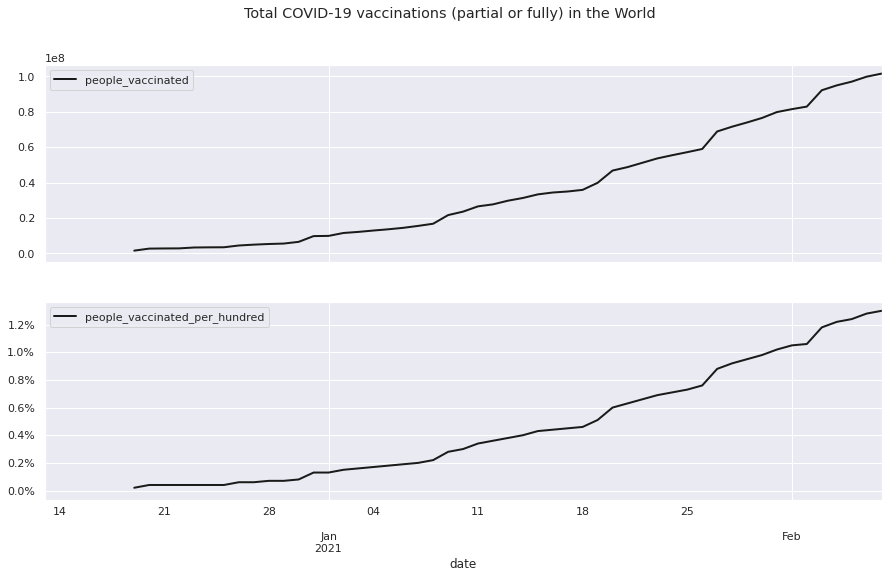

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
for i, col in enumerate(['people_vaccinated', 'people_vaccinated_per_hundred']):
    www.plot(y=col, ax=ax.flat[i], lw=2, color='k')
#ax[0].plot(pred_dates, VAX_pred, ls=':', color='k', label='7 days prediction')
xlim = ax[0].get_xlim()
#ax[0].set(
#    xlim=(xlim[0], pred_dates[-1])
#)
ax[0].legend()
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(100, 1))
fig.suptitle('Total COVID-19 vaccinations (partial or fully) in the World')
plt.show()

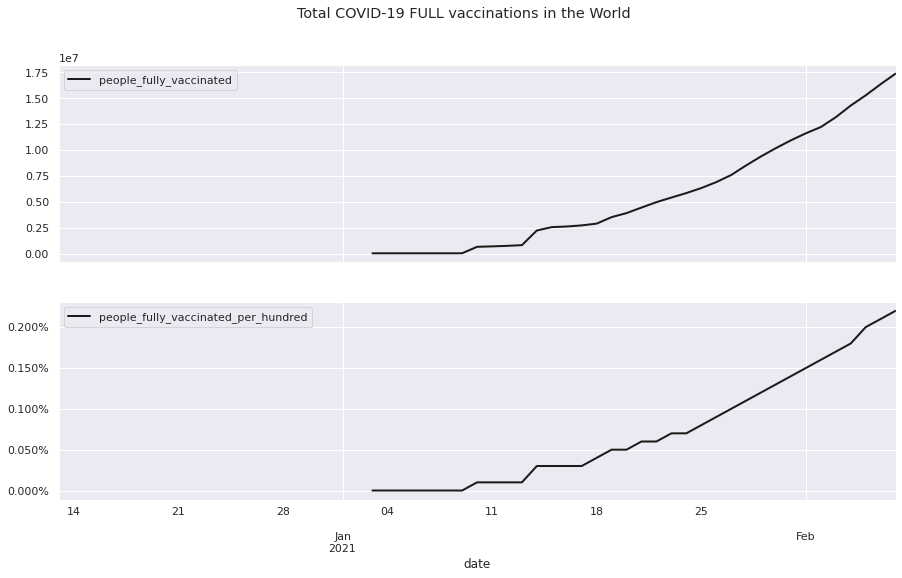

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
for i, col in enumerate(['people_fully_vaccinated', 'people_fully_vaccinated_per_hundred']):
    www.plot(y=col, ax=ax.flat[i], lw=2, color='k')
#ax[0].plot(pred_dates, VAX_pred, ls=':', color='k', label='7 days prediction')
#xlim = ax[0].get_xlim()
#ax[0].set(
#    xlim=(xlim[0], pred_dates[-1])
#)
#ax[0].legend()
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(100, 3))
fig.suptitle('Total COVID-19 FULL vaccinations in the World')
plt.show()

# Predictions

Predictions based on last week observations

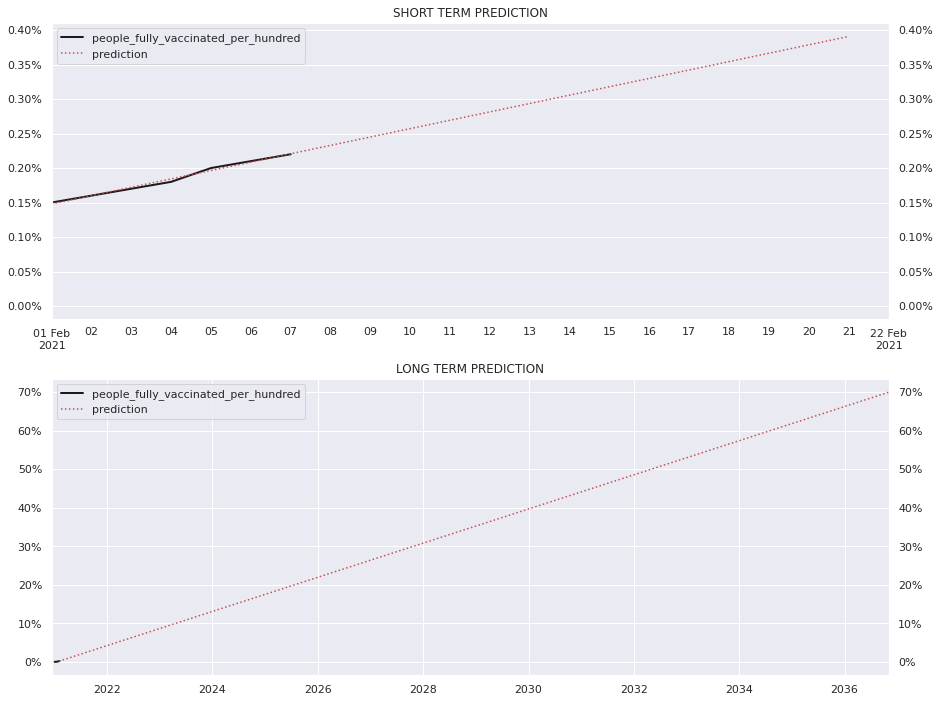

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(15, 12))

www.plot(y='people_fully_vaccinated_per_hundred', ax=ax[0], lw=2, color='k')
ax[0].plot(pred_X_dt[:7*3], pred_Y_pt[:7*3], color='r', ls=':', label='prediction')
ax[0].yaxis.set_major_formatter(mtick.PercentFormatter(100, 2))
ax[0].set(
    title='SHORT TERM PREDICTION',
    xlim=(pred_X_dt[0], pred_X_dt[7*3]),
    xlabel=None
)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d %b\n%Y'))
ax[0].tick_params(axis='y', which='both', labelleft=True, labelright=True)
ax[0].legend(loc='upper left')

www.plot(y='people_fully_vaccinated_per_hundred', ax=ax[1], lw=2, color='k')
ax[1].plot(pred_X_dt, pred_Y_pt, color='r', ls=':', label='prediction')
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(100, 0))
ax[1].set(
    title='LONG TERM PREDICTION',
    xlim=(ax[1].get_xlim()[0], pred_X_dt[-1]),
    xlabel=None
)
ax[1].tick_params(axis='y', which='both', labelleft=True, labelright=True)
ax[1].legend(loc='upper left')

plt.show()

# COUNTRIES

## partial

In [17]:
latest = df.groupby('location')[['date', 'people_vaccinated']].max()

latest = latest[latest.index!='World']

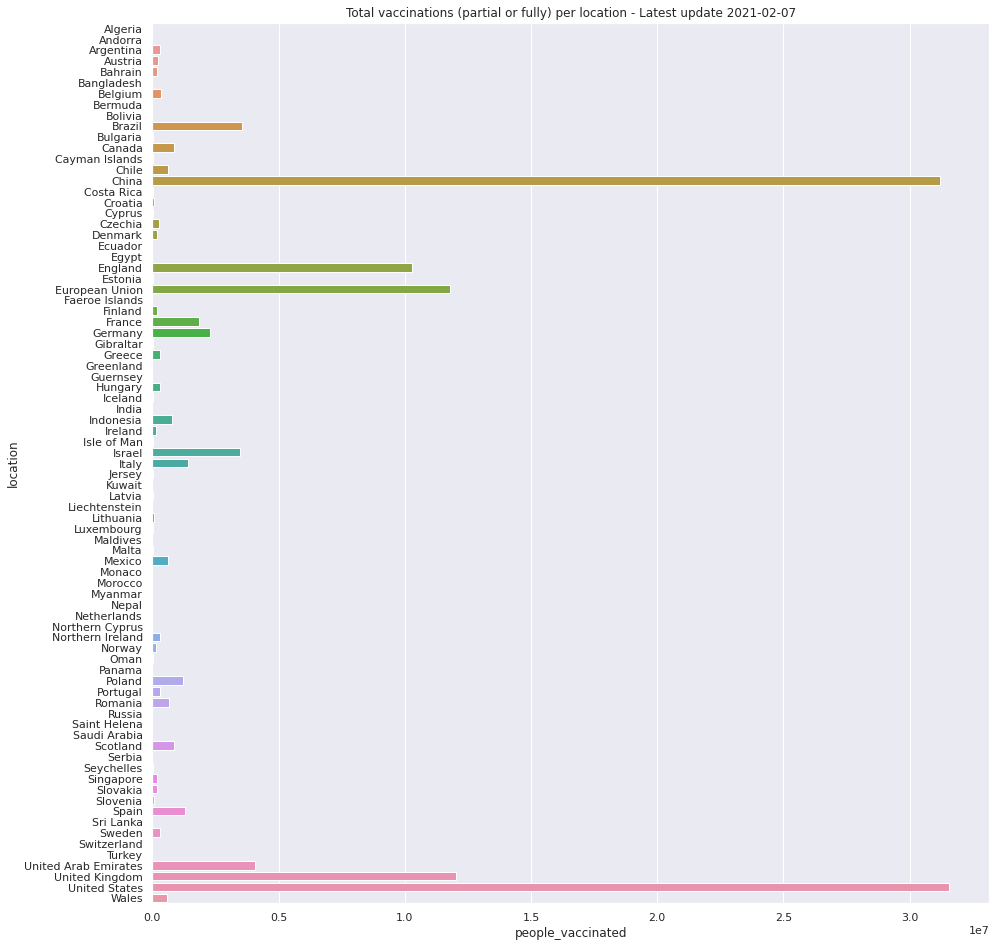

In [18]:
fig, ax = plt.subplots(figsize=(15, latest.index.size / 5))
sns.barplot(
    data=latest,
    y=latest.index, x='people_vaccinated',
    ax=ax
)
ax.set(
    title="Total vaccinations (partial or fully) per location - "
    fr'Latest update {www.index.max().date()}'
)
plt.show()

In [19]:
latest_pct = df.groupby('location')[['date', 'people_vaccinated_per_hundred']].max()

latest_pct = latest_pct[latest_pct.index!='World']

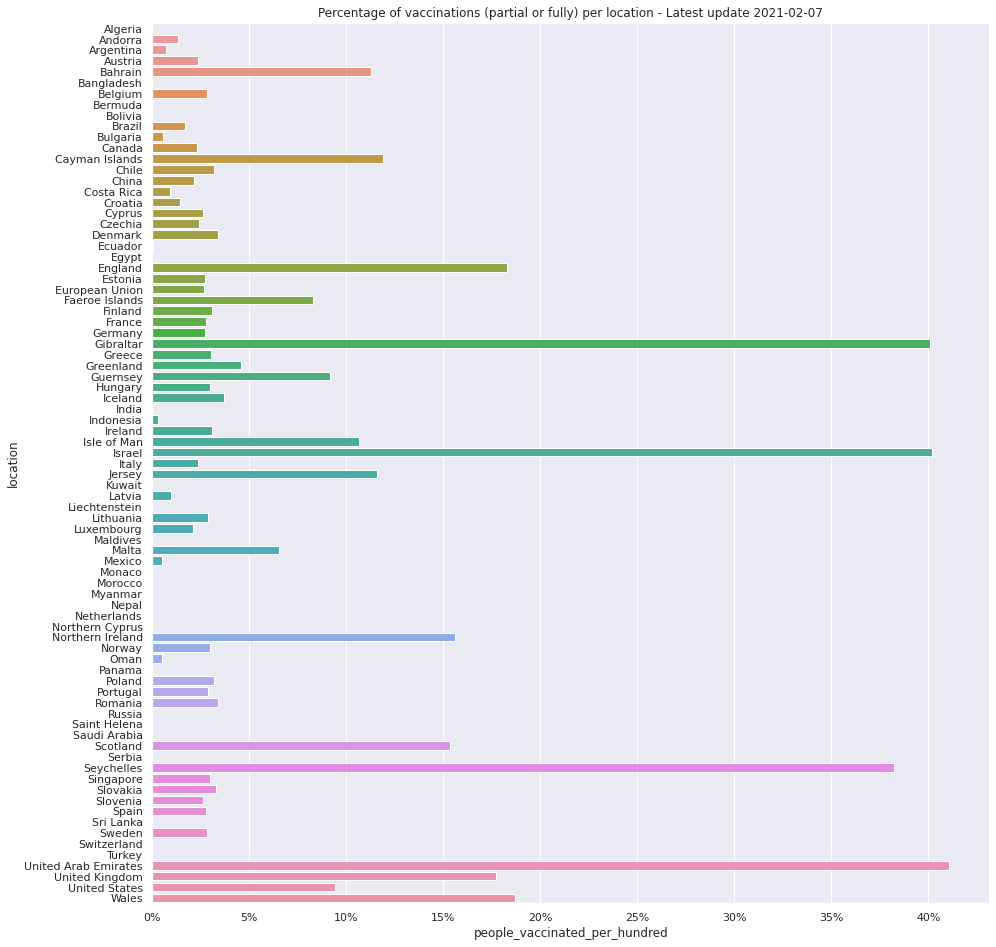

In [20]:
fig, ax = plt.subplots(figsize=(15, latest_pct.index.size / 5))
sns.barplot(
    data=latest_pct,
    y=latest_pct.index, x='people_vaccinated_per_hundred',
    ax=ax
)
ax.set(
    title="Percentage of vaccinations (partial or fully) per location - "
    fr'Latest update {www.index.max().date()}'
)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(100, 0))
plt.show();

## FULL

In [21]:
latest_full = df.groupby('location')[['date', 'people_fully_vaccinated']].max()

latest_full = latest_full[latest_full.index!='World']

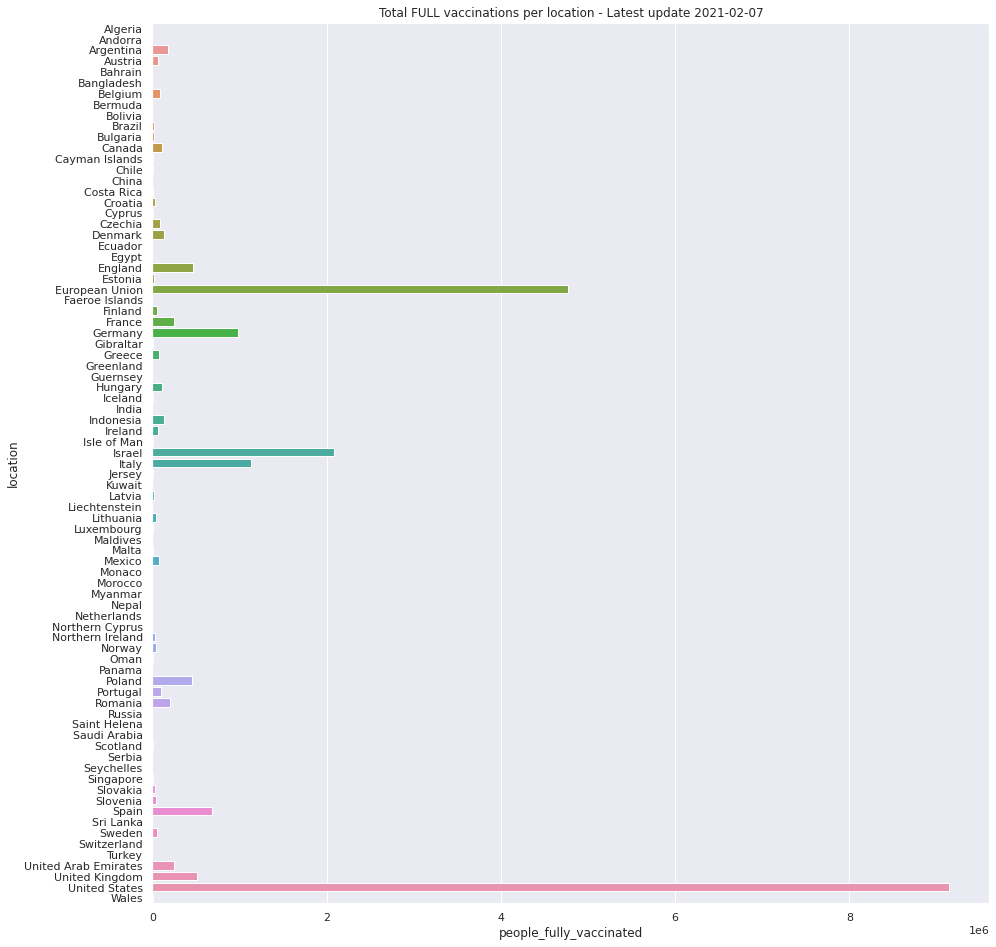

In [22]:
fig, ax = plt.subplots(figsize=(15, latest_full.index.size / 5))
sns.barplot(
    data=latest_full,
    y=latest.index, x='people_fully_vaccinated',
    ax=ax
)
ax.set(
    title="Total FULL vaccinations per location - "
    fr'Latest update {www.index.max().date()}'
)
plt.show()

In [23]:
latest_pct_full = df.groupby('location')[['date', 'people_fully_vaccinated_per_hundred']].max()

latest_pct_full = latest_pct_full[latest_pct_full.index!='World']

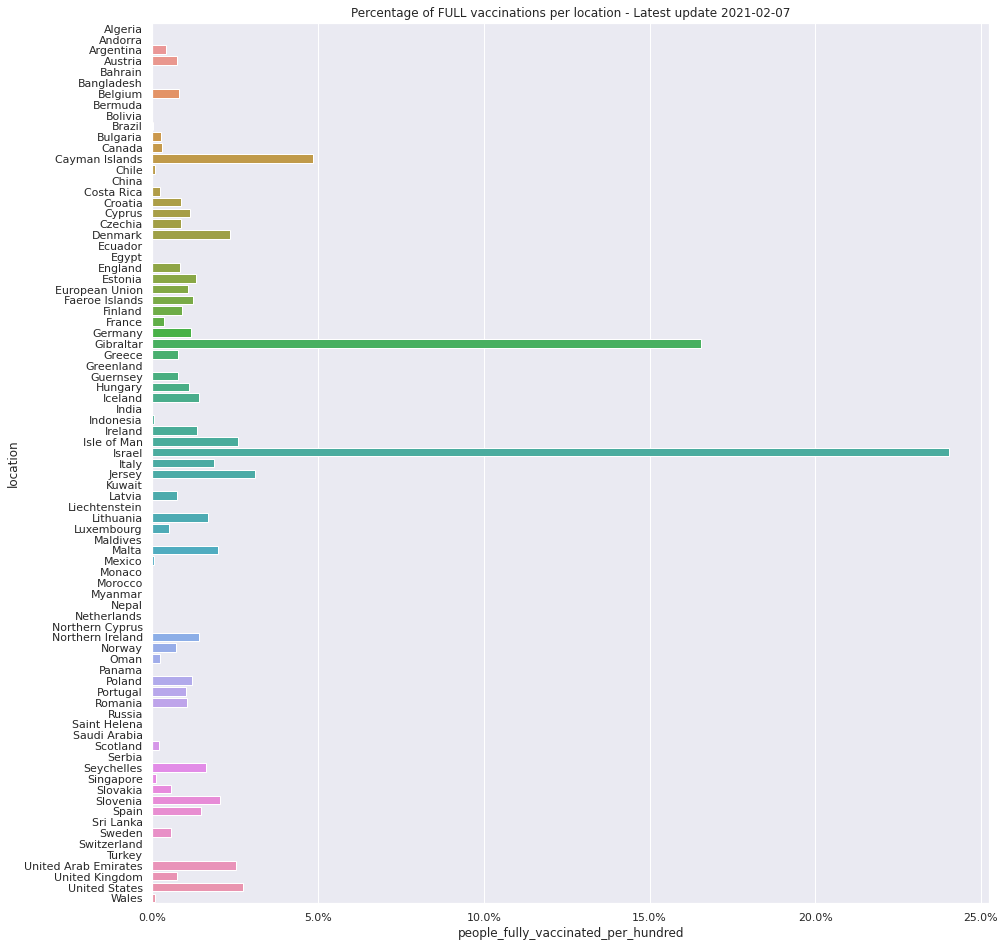

In [24]:
fig, ax = plt.subplots(figsize=(15, latest_pct_full.index.size / 5))
sns.barplot(
    data=latest_pct_full,
    y=latest_pct_full.index, x='people_fully_vaccinated_per_hundred',
    ax=ax
)
ax.set(
    title="Percentage of FULL vaccinations per location - "
    fr'Latest update {www.index.max().date()}'
)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(100, 1))
plt.show();

In [25]:
columns = [
    'people_vaccinated', 'people_fully_vaccinated',
    'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
    'daily_vaccinations', 'daily_vaccinations_per_million'
]

# Algeria

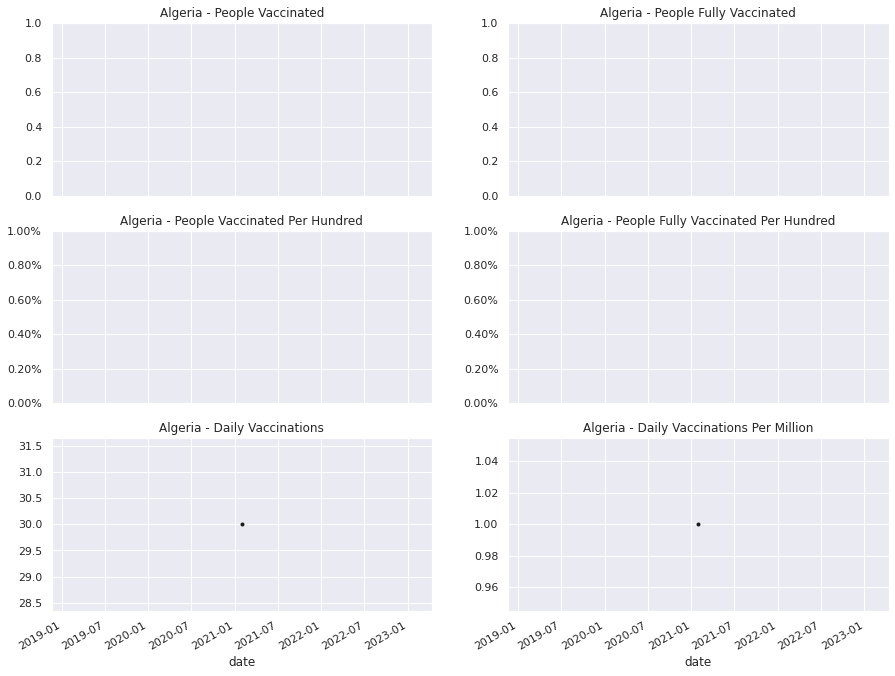

# Andorra

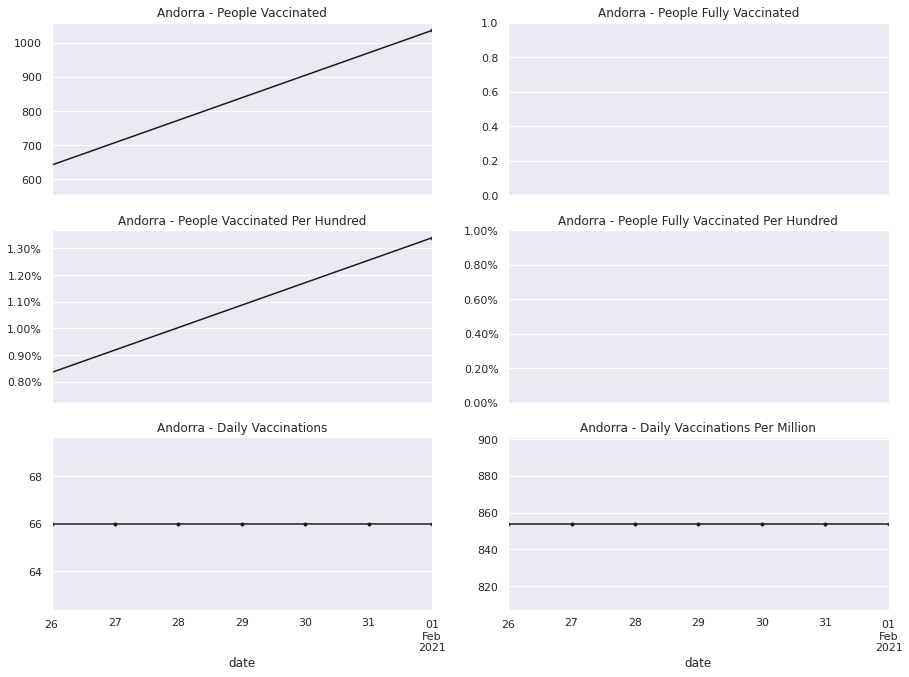

# Argentina

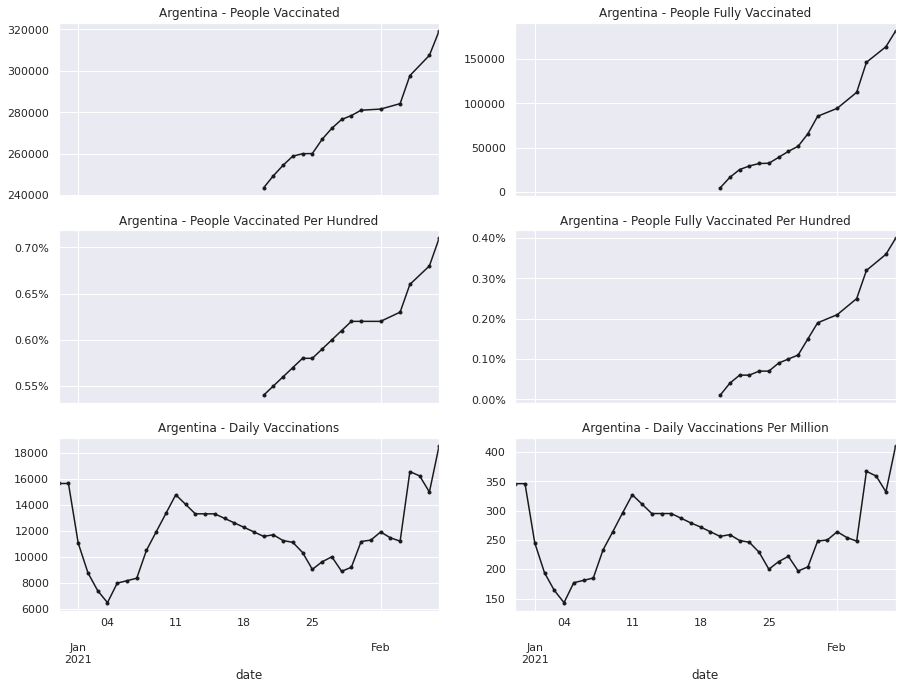

# Austria

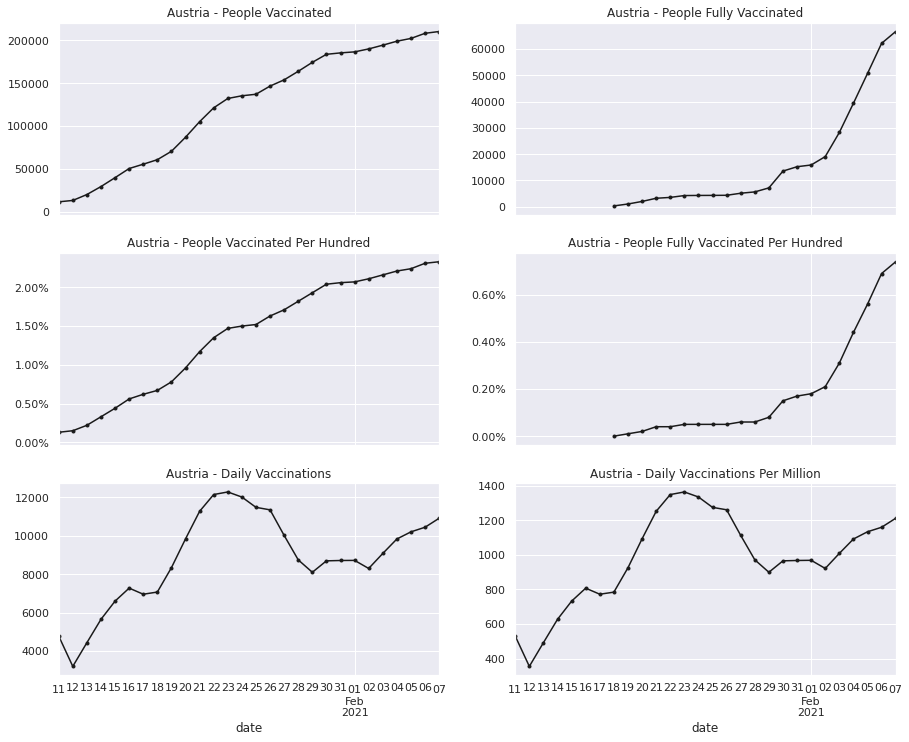

# Bahrain

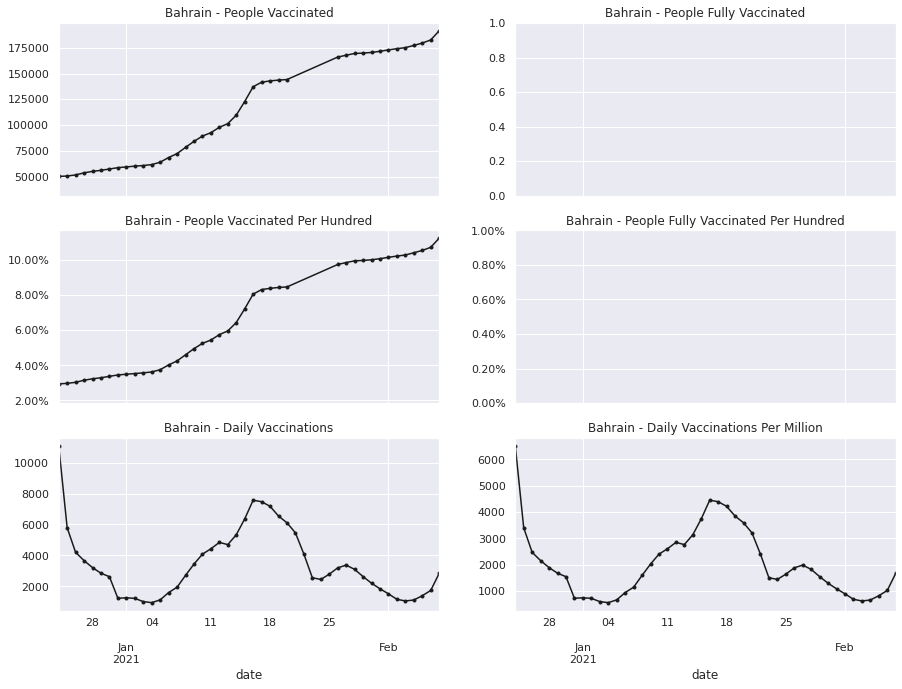

# Bangladesh

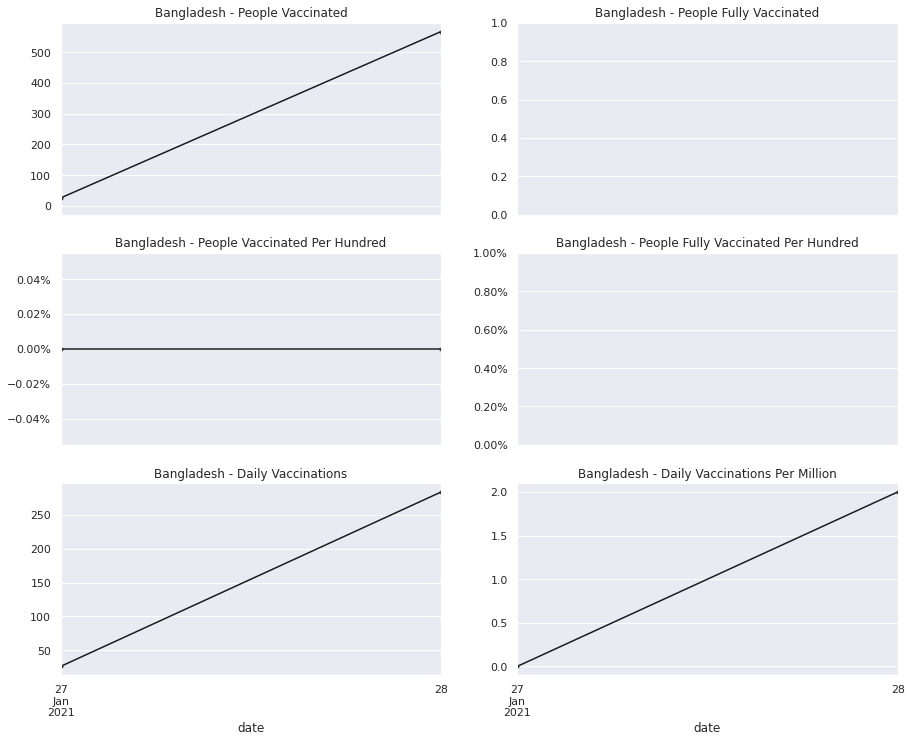

# Belgium

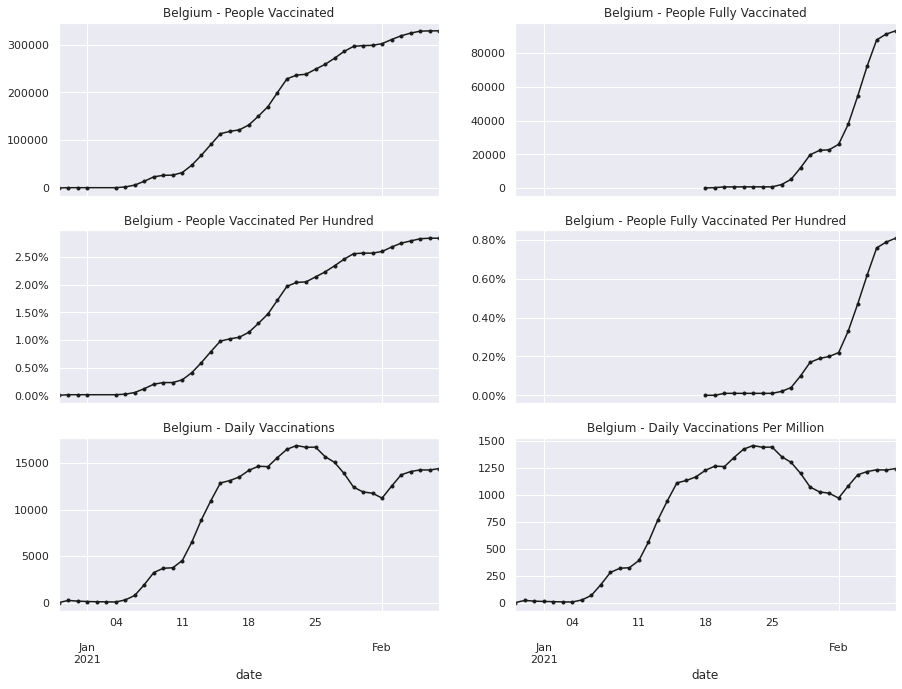

# Bermuda

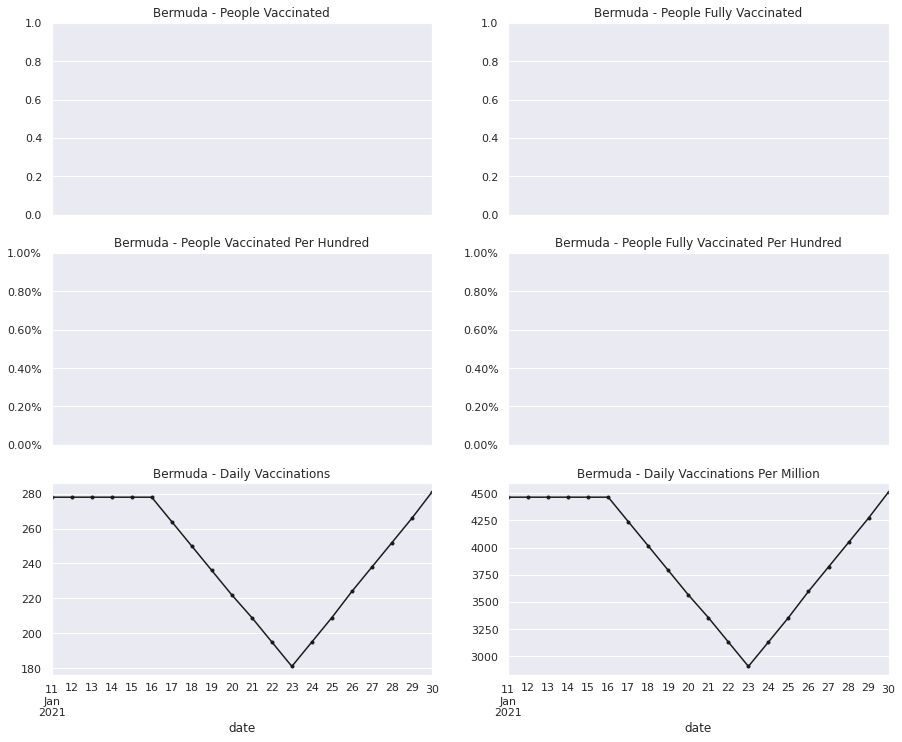

# Bolivia

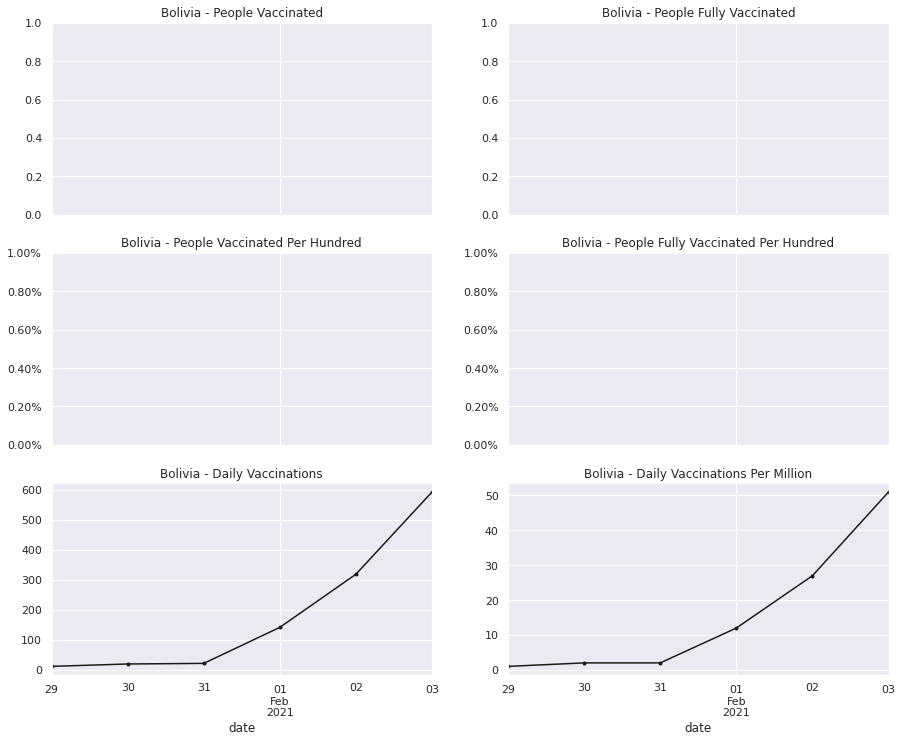

# Brazil

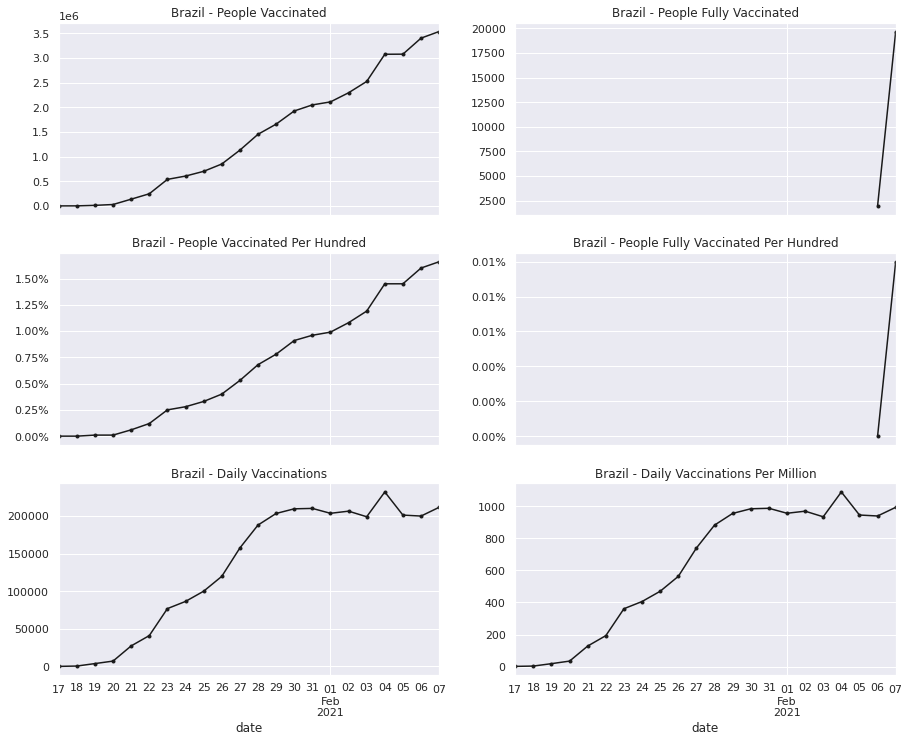

# Bulgaria

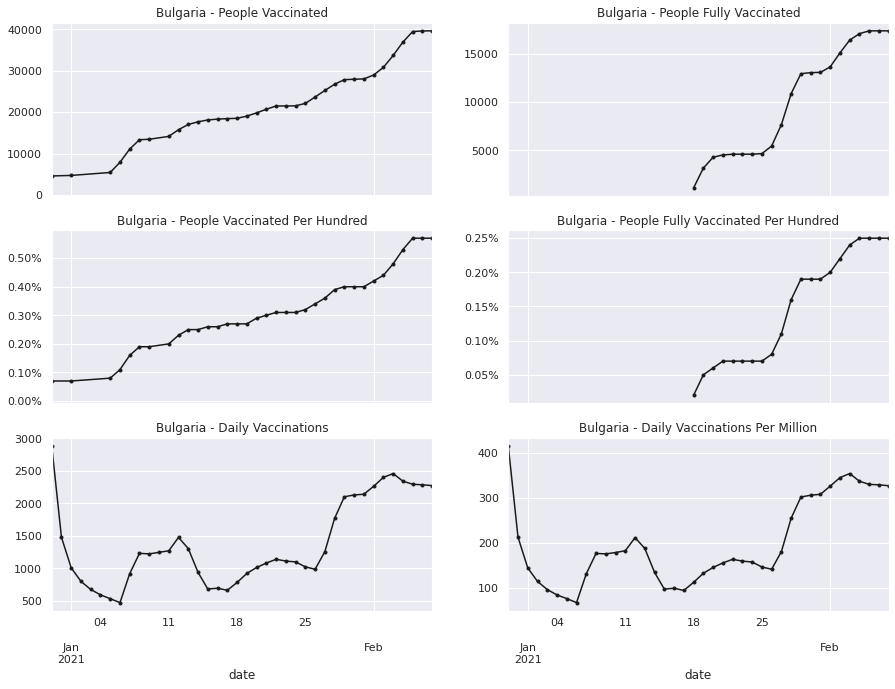

# Canada

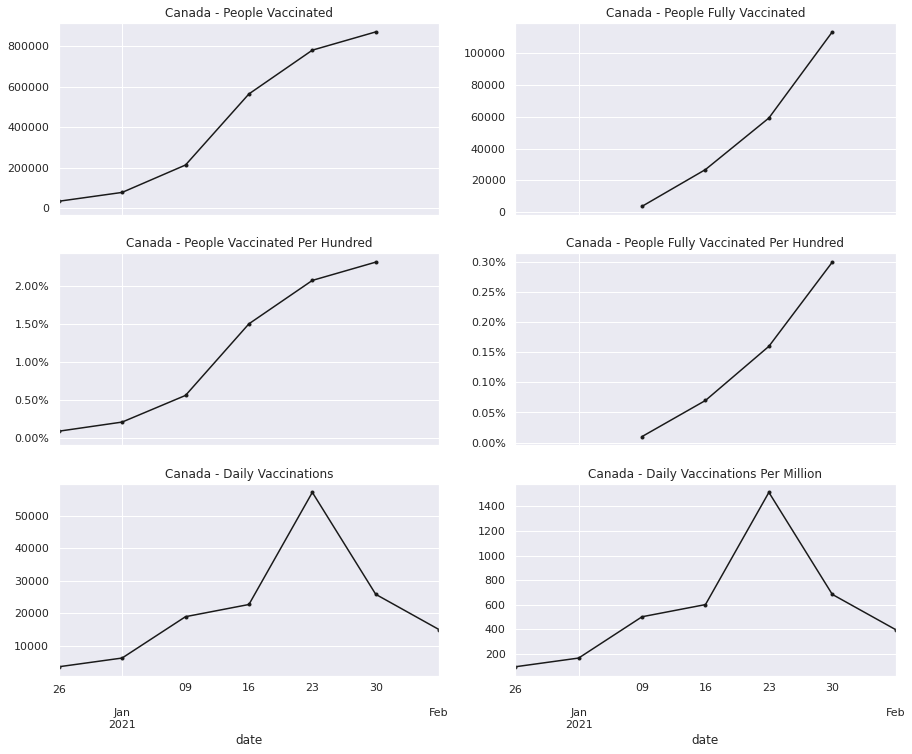

# Cayman Islands

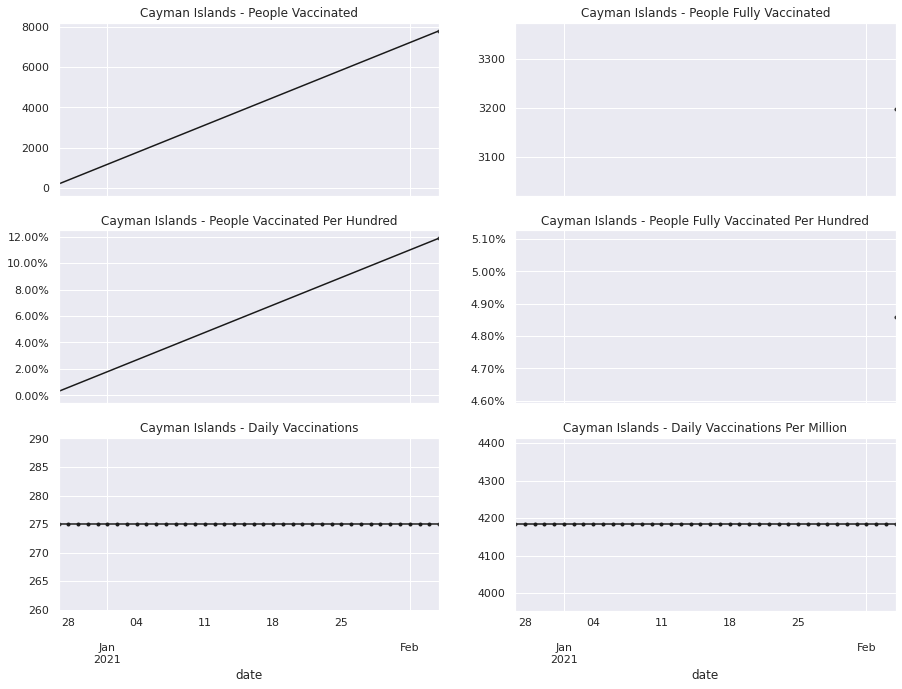

# Chile

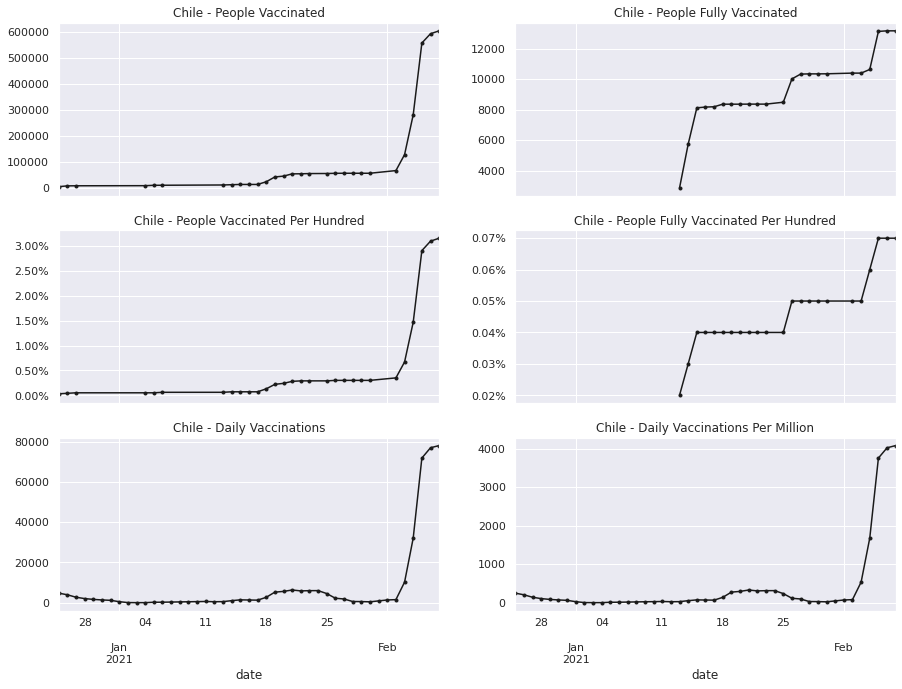

# China

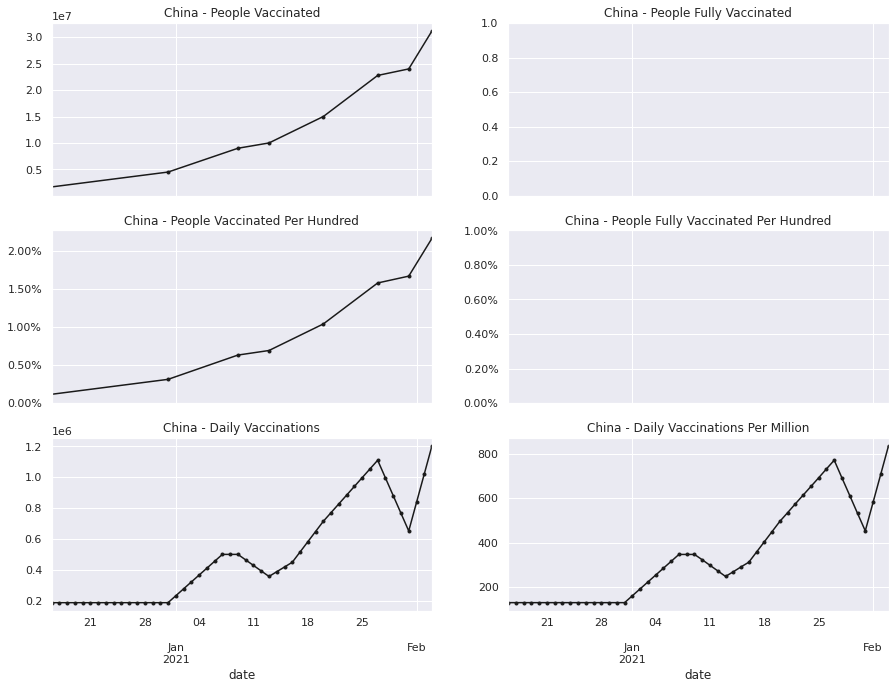

# Costa Rica

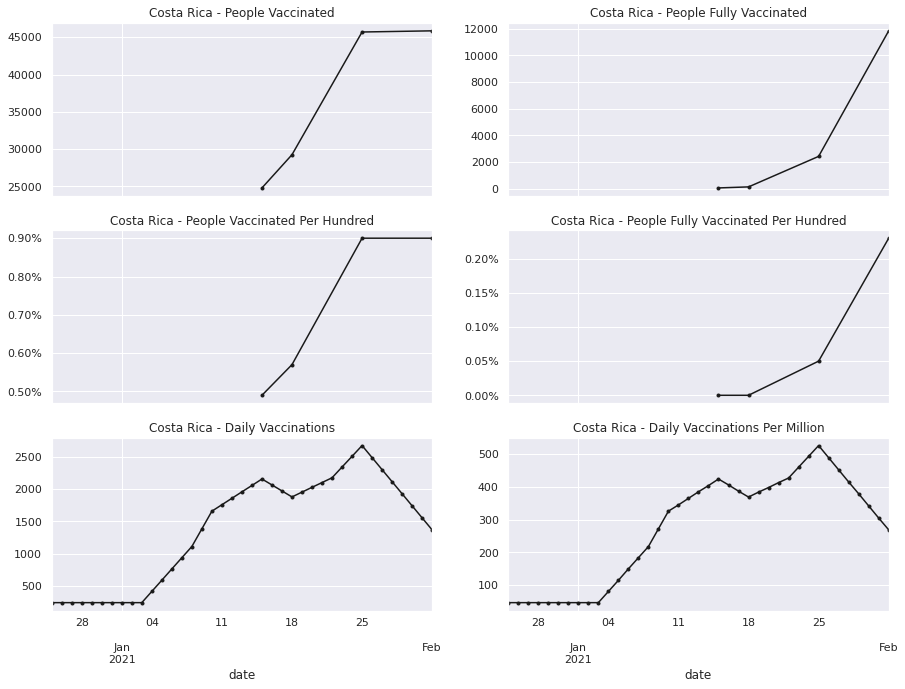

# Croatia

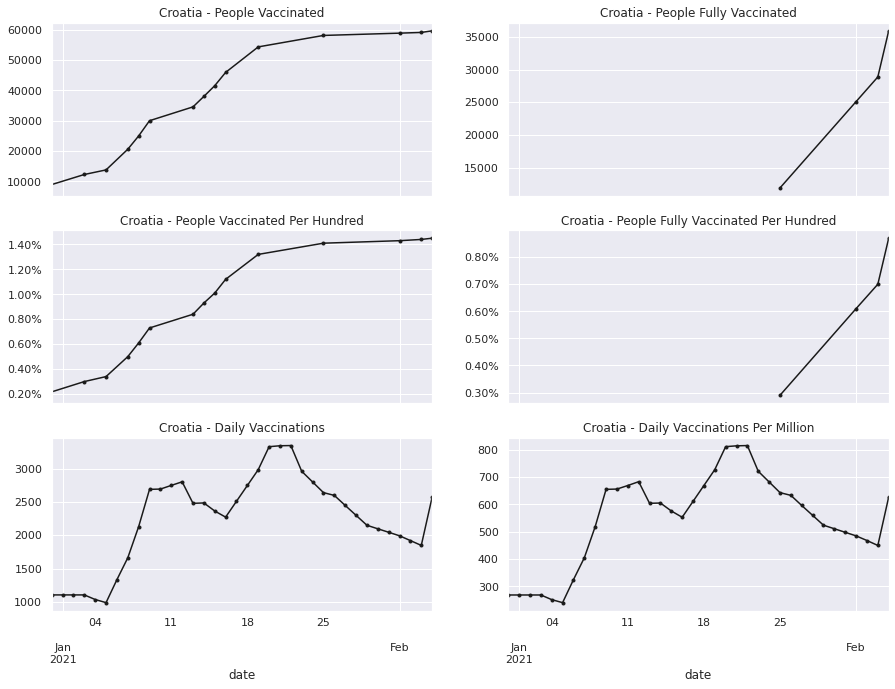

# Cyprus

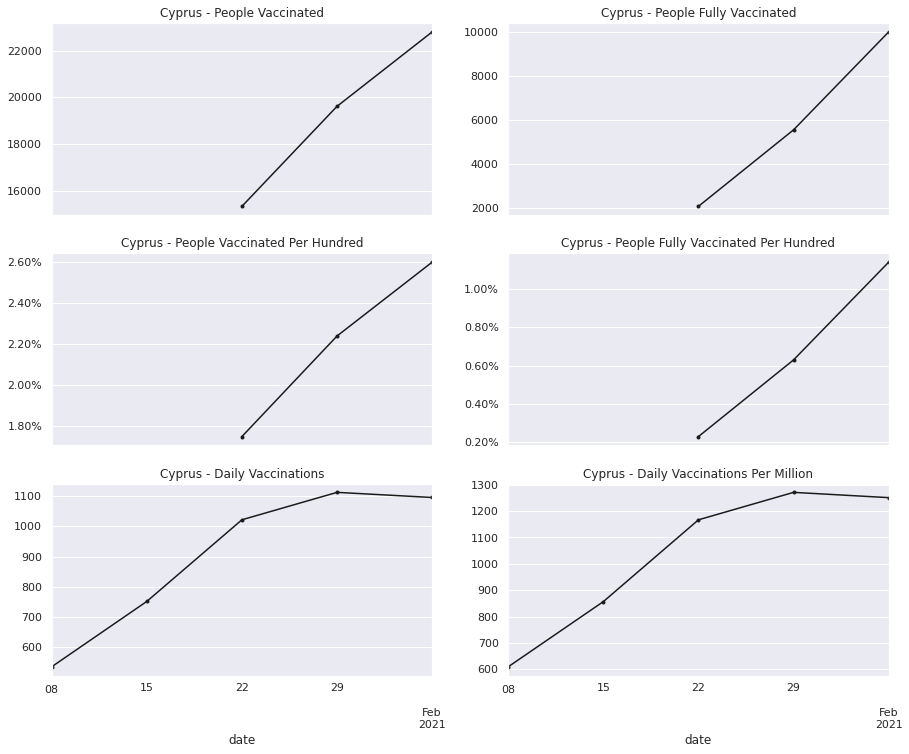

# Czechia

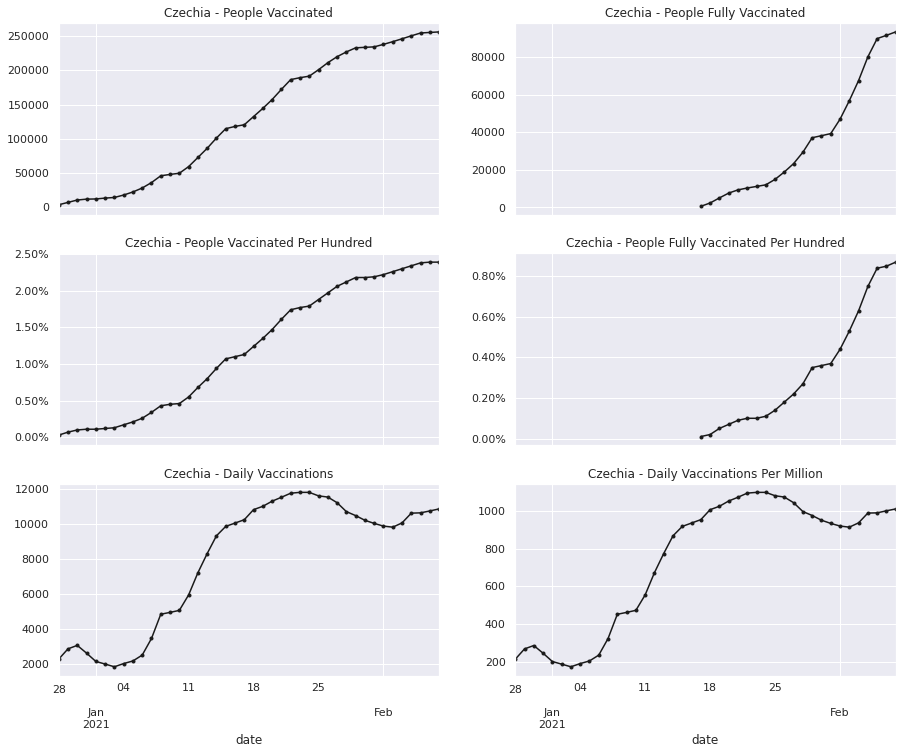

# Denmark

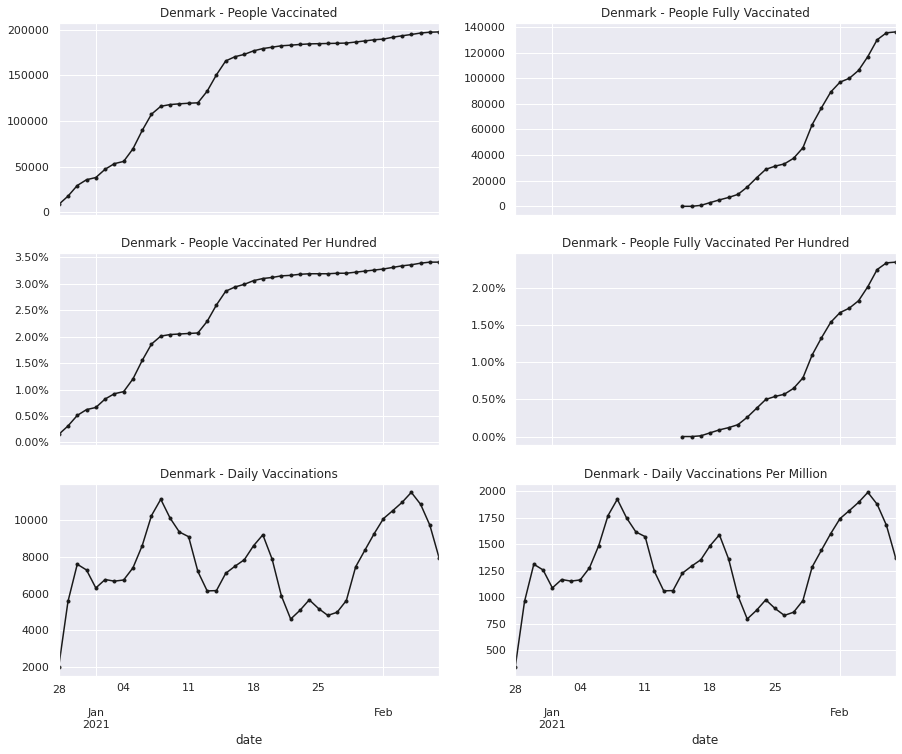

# Ecuador

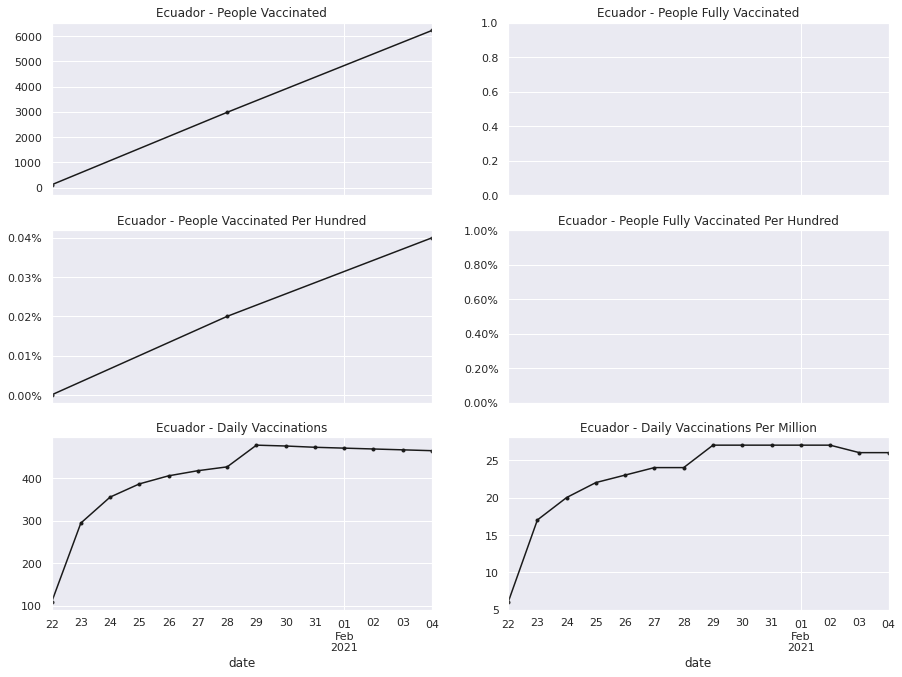

# Egypt

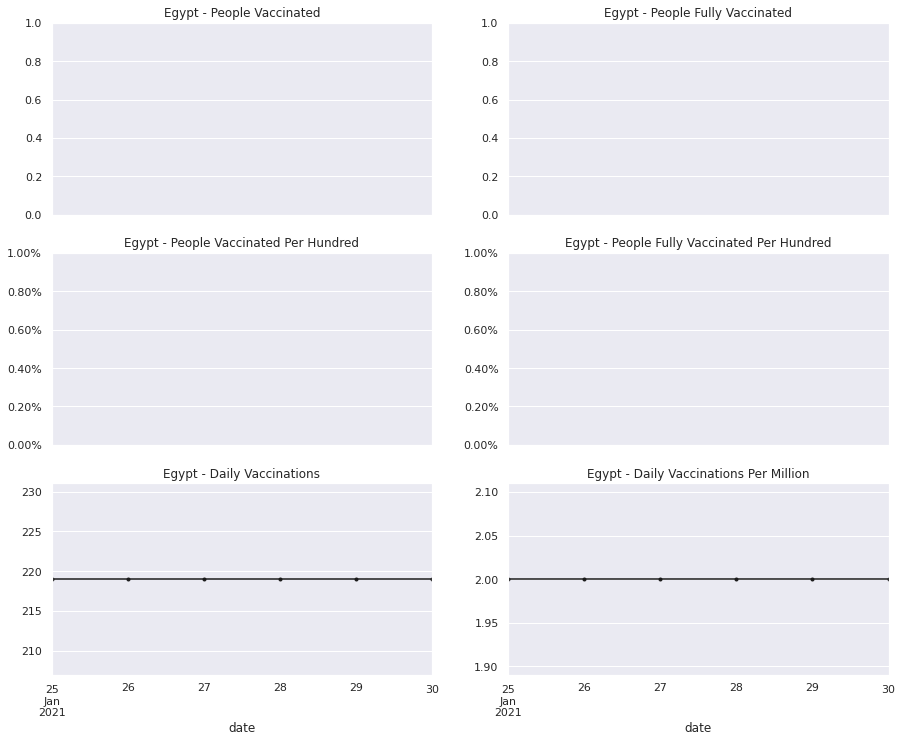

# England

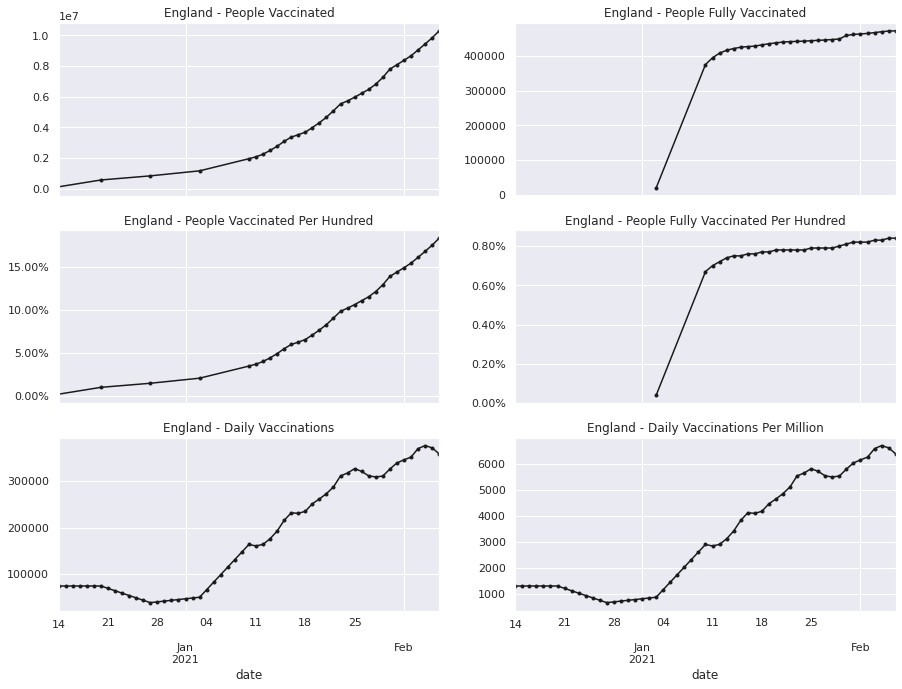

# Estonia

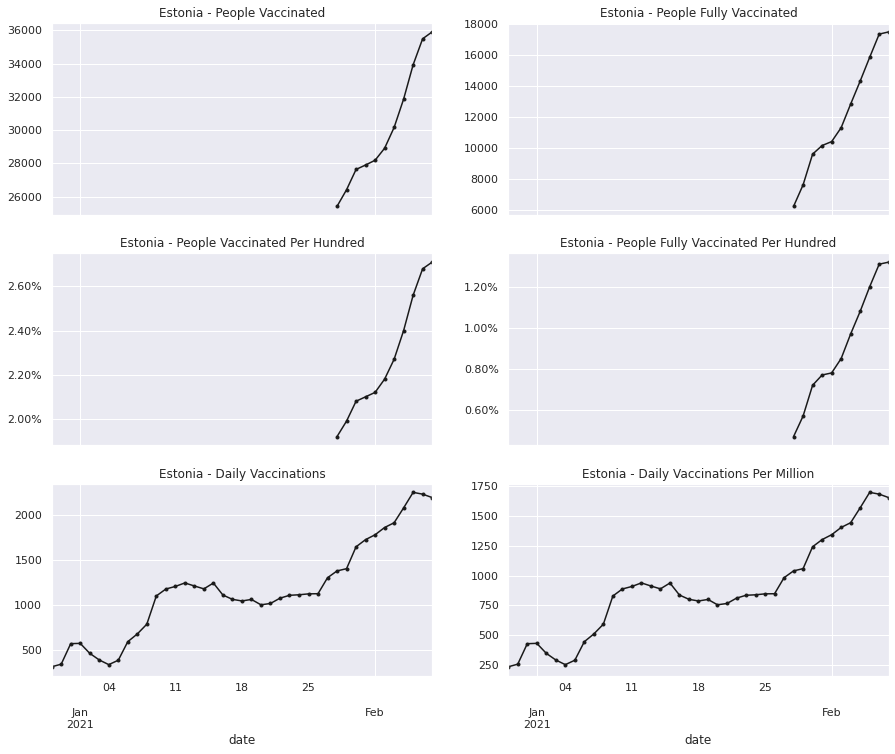

# European Union

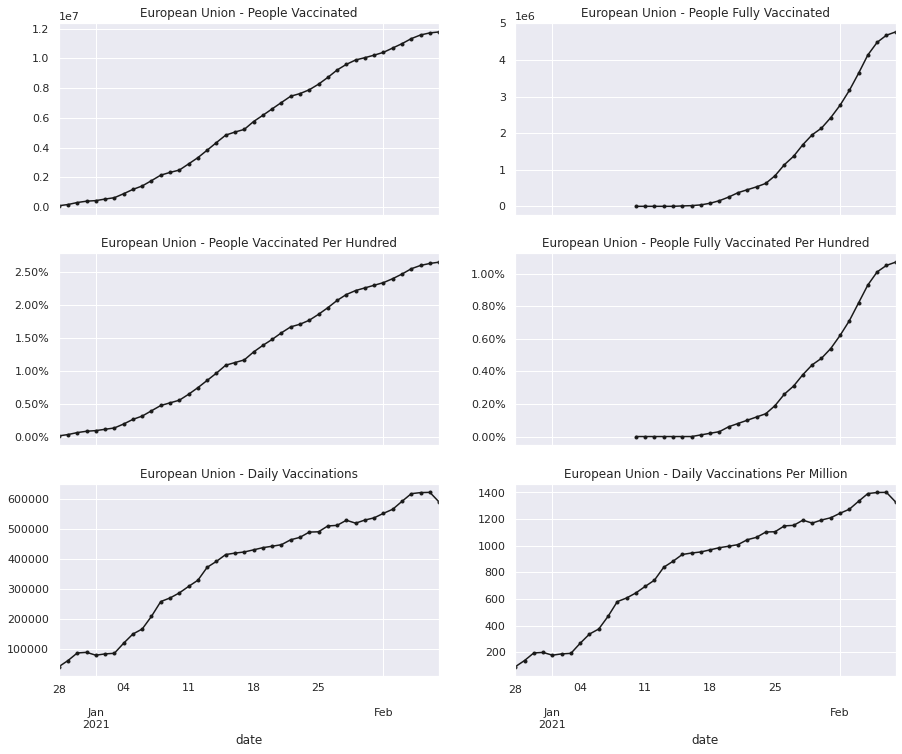

# Faeroe Islands

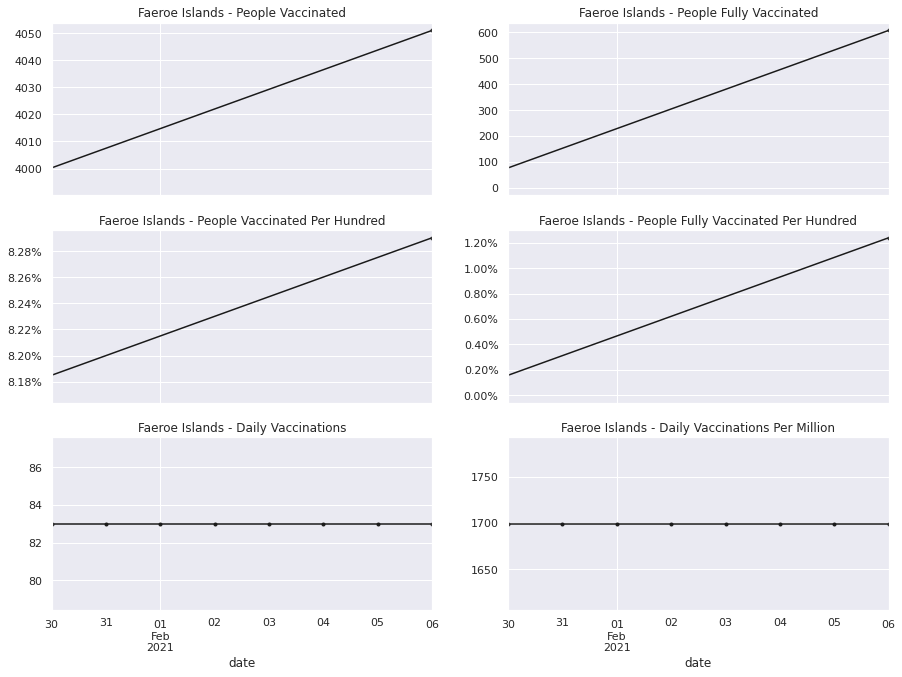

# Finland

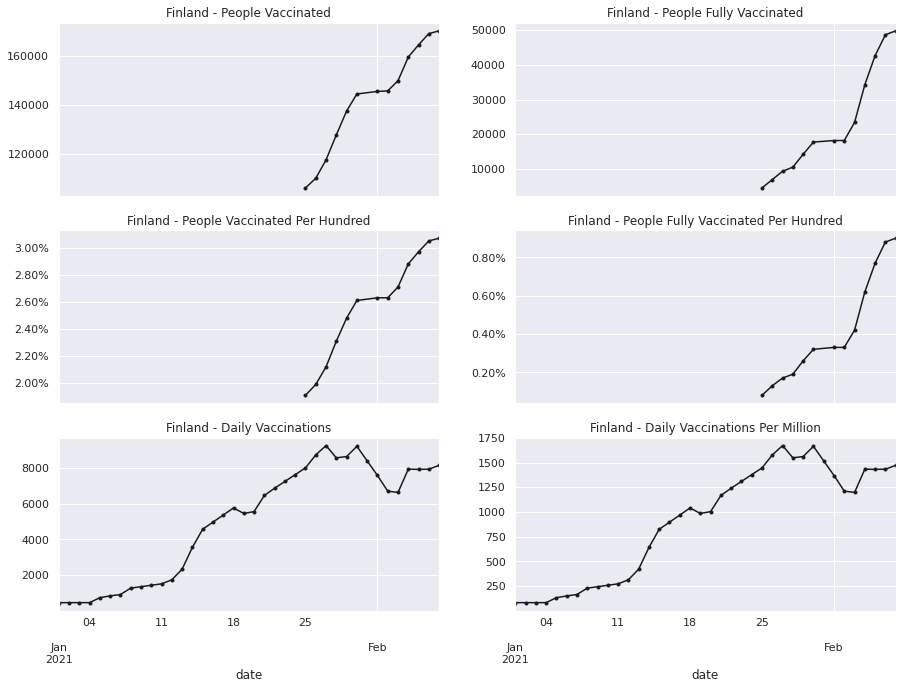

# France

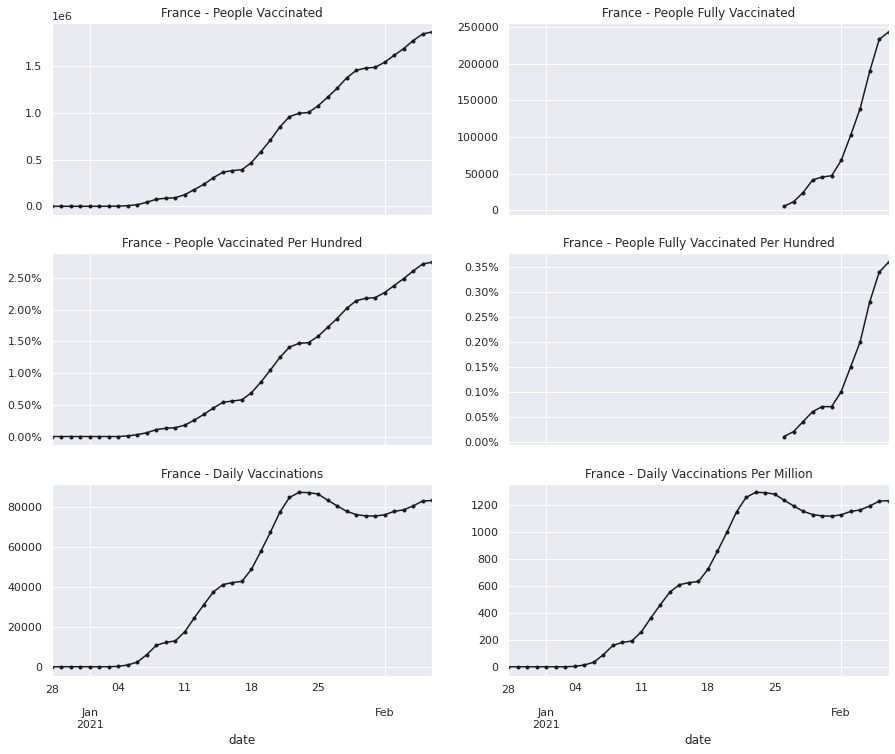

# Germany

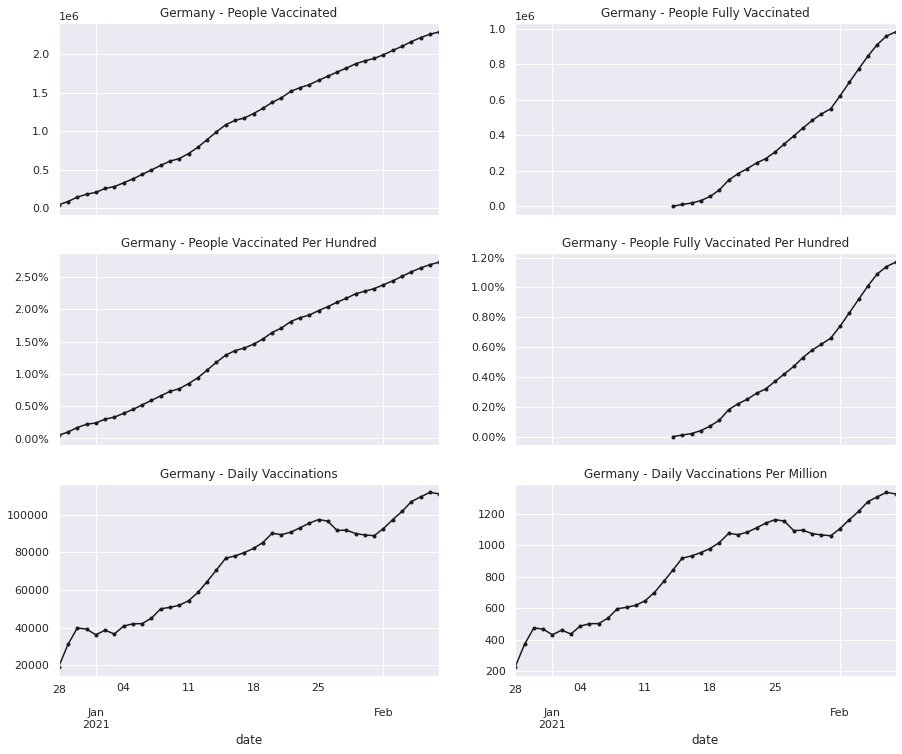

# Gibraltar

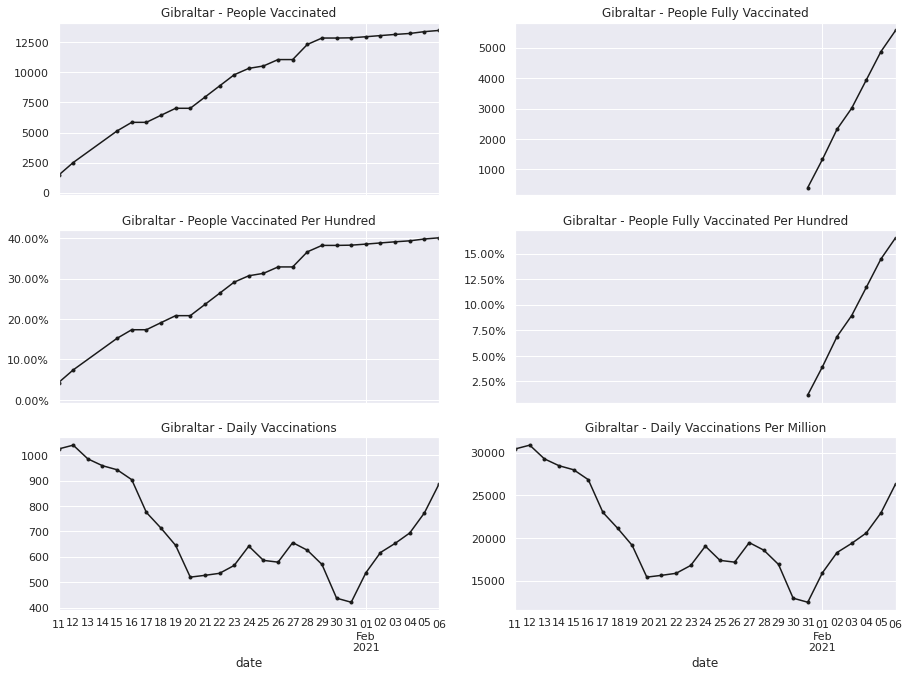

# Greece

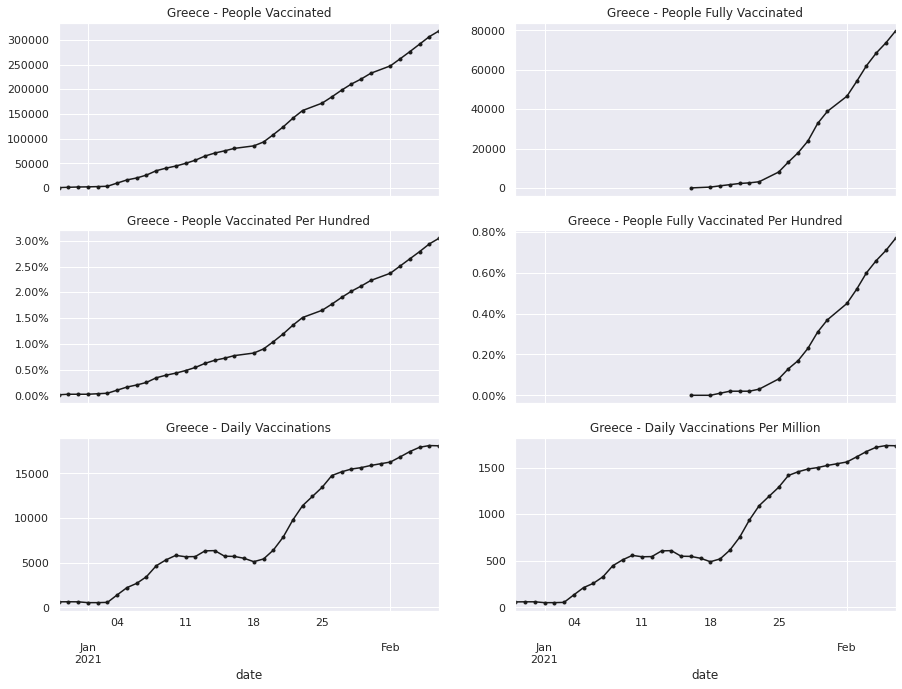

# Greenland

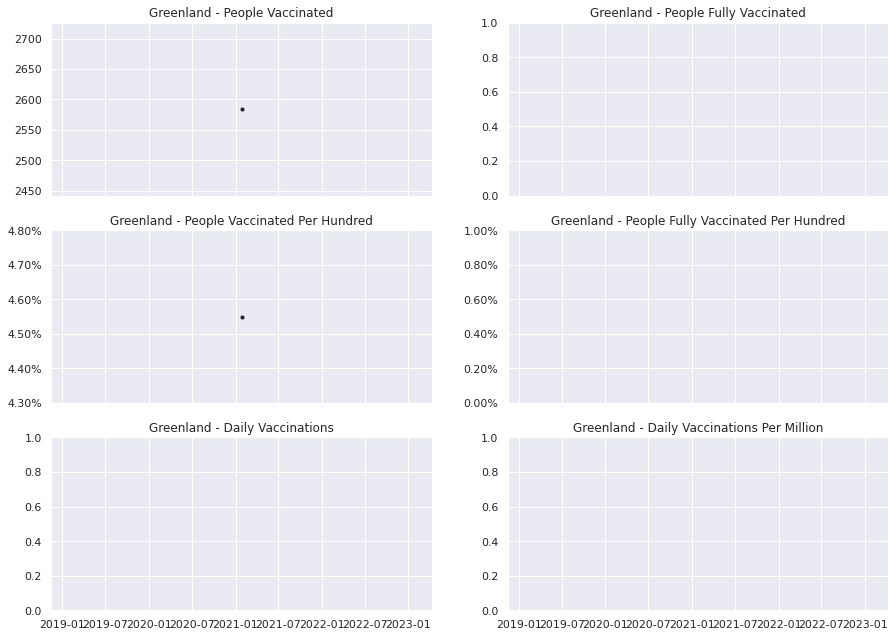

# Guernsey

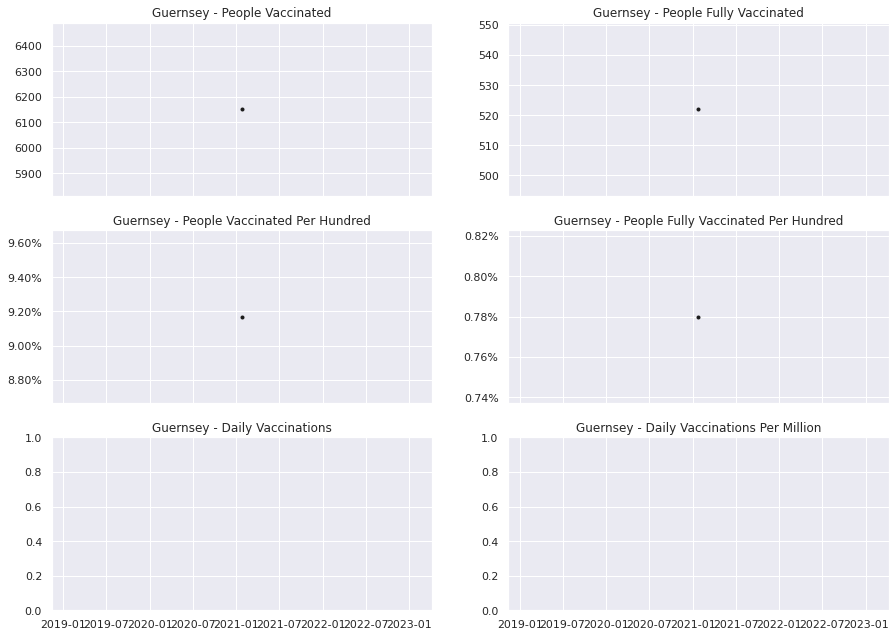

# Hungary

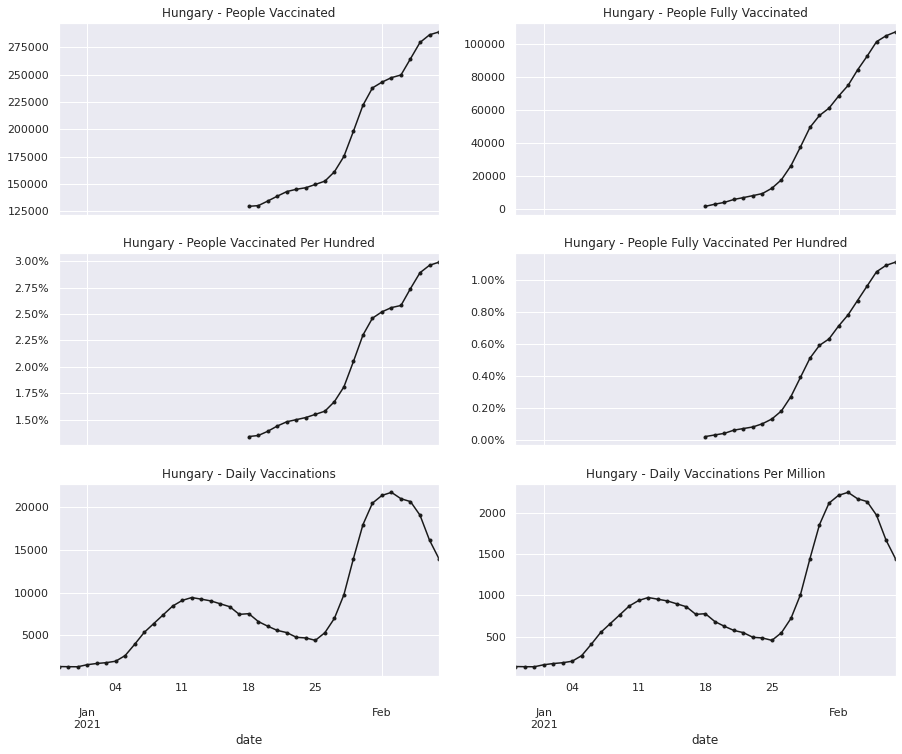

# Iceland

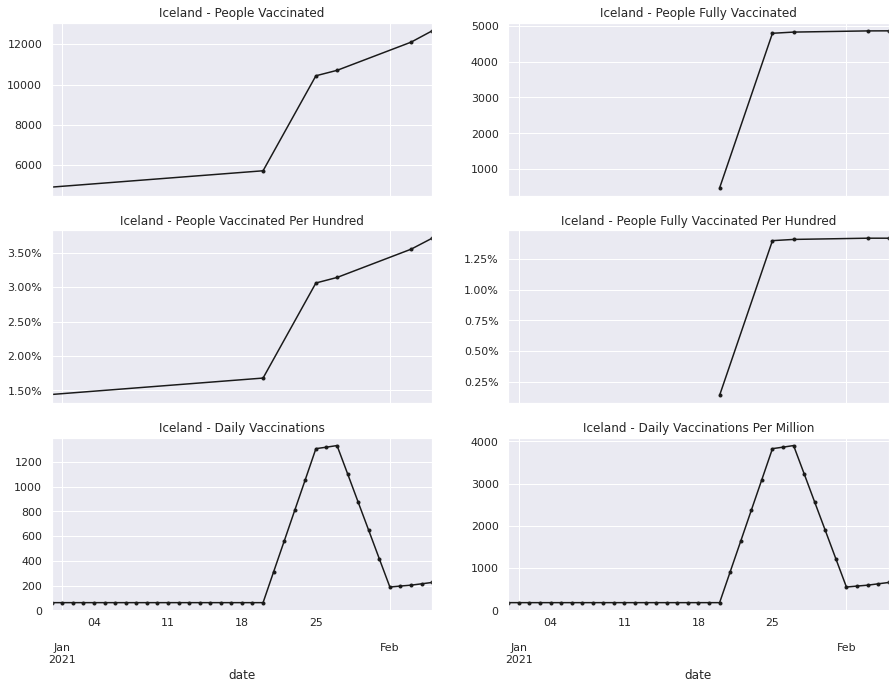

# India

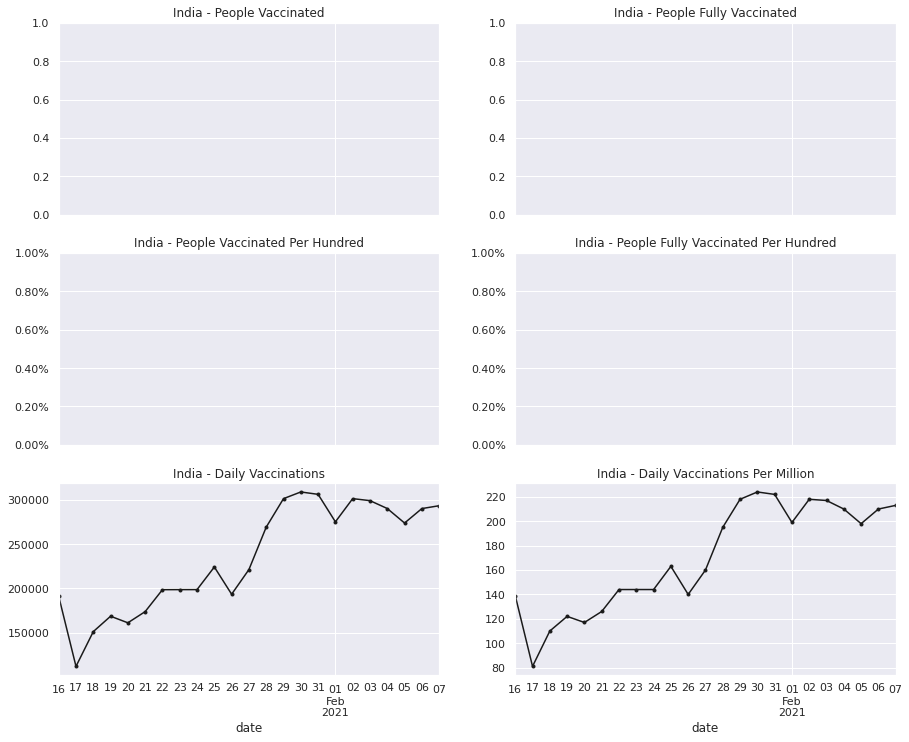

# Indonesia

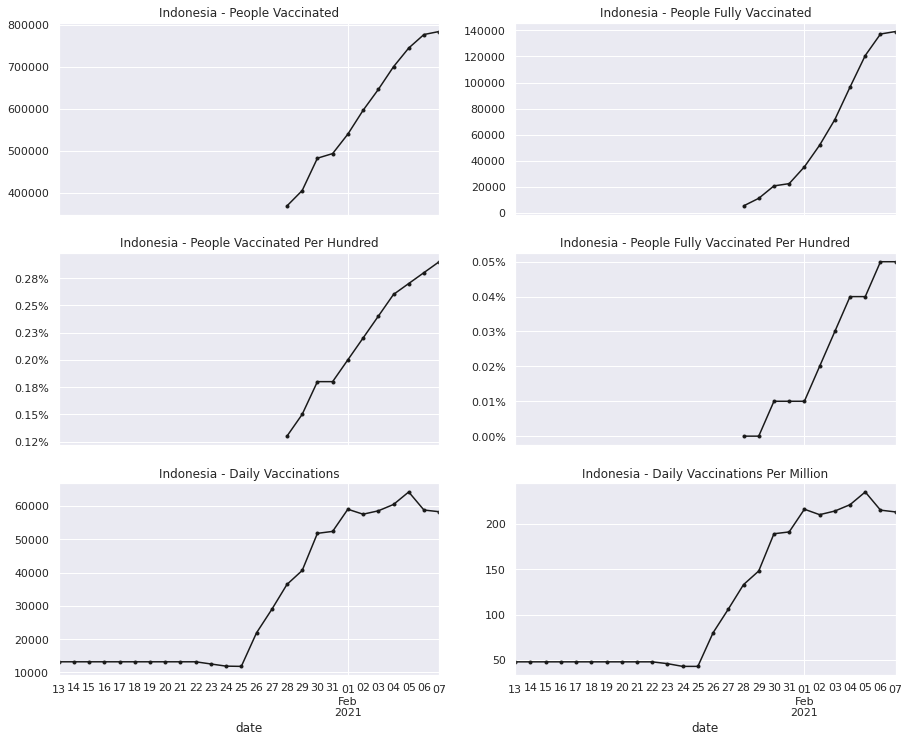

# Ireland

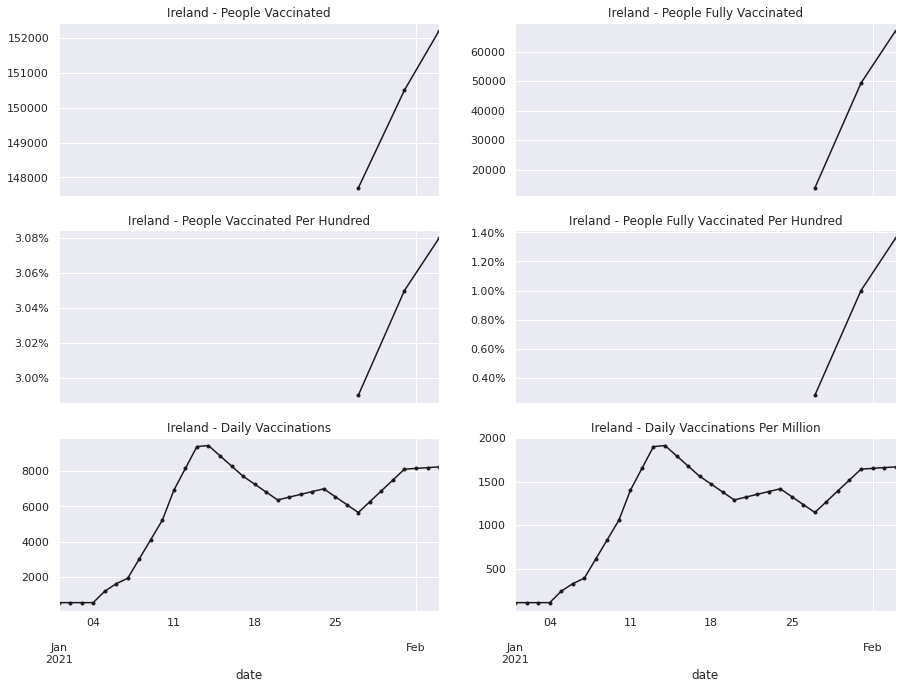

# Isle of Man

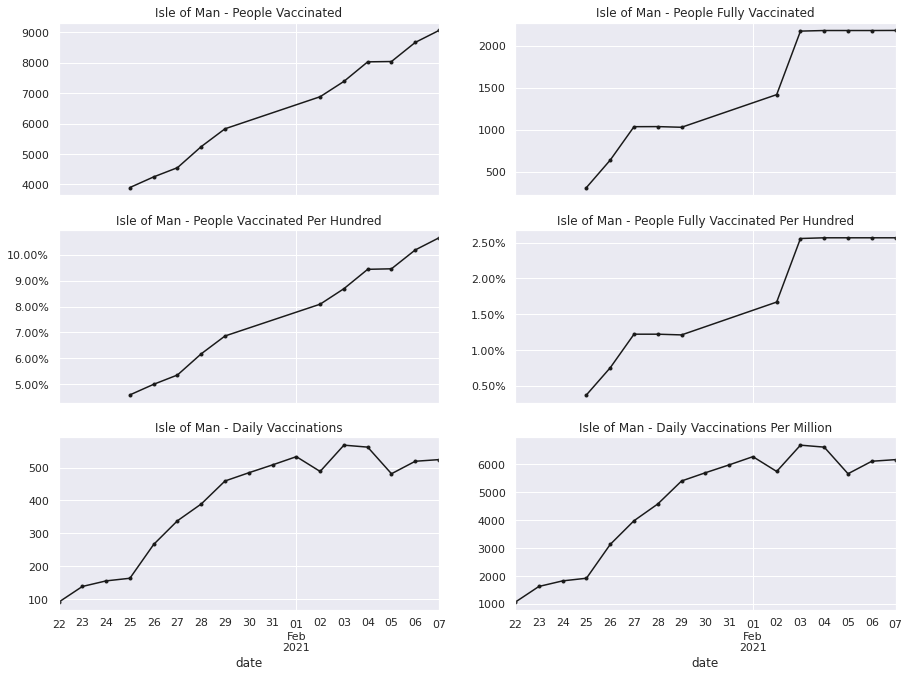

# Israel

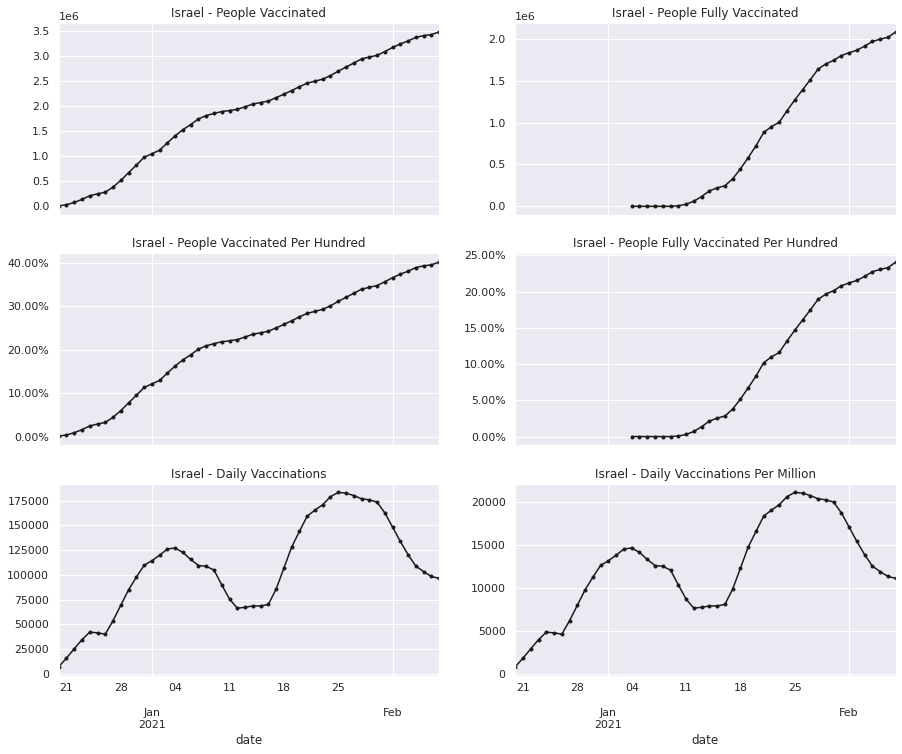

# Italy

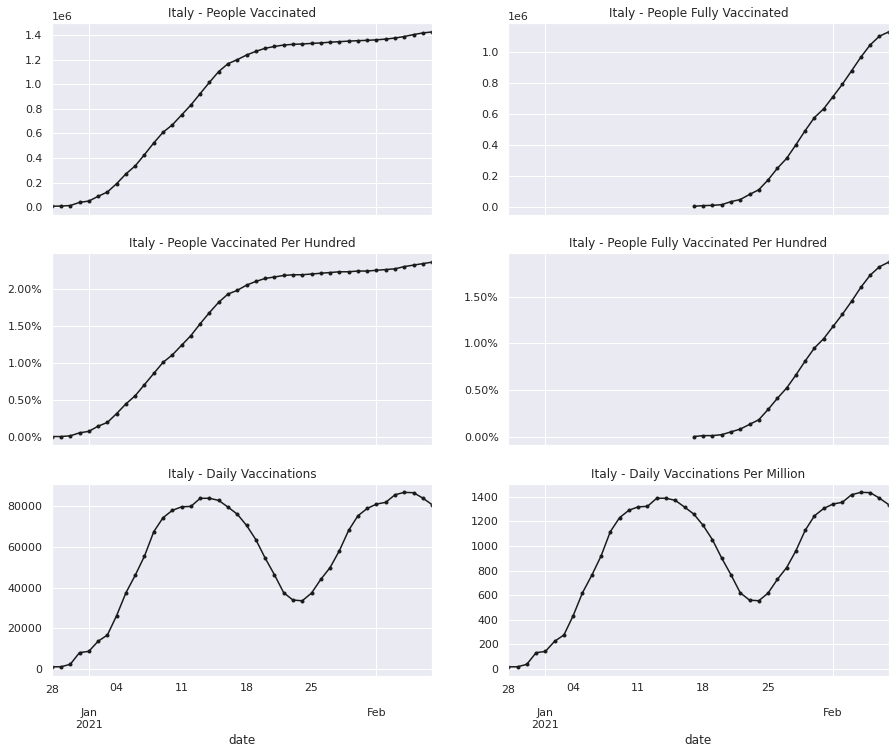

# Jersey

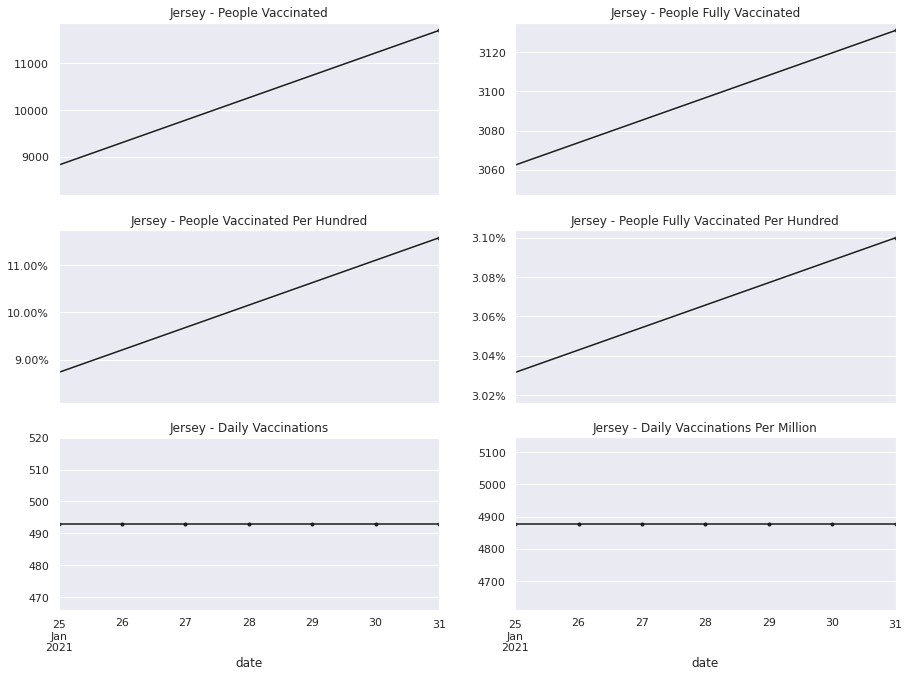

# Kuwait

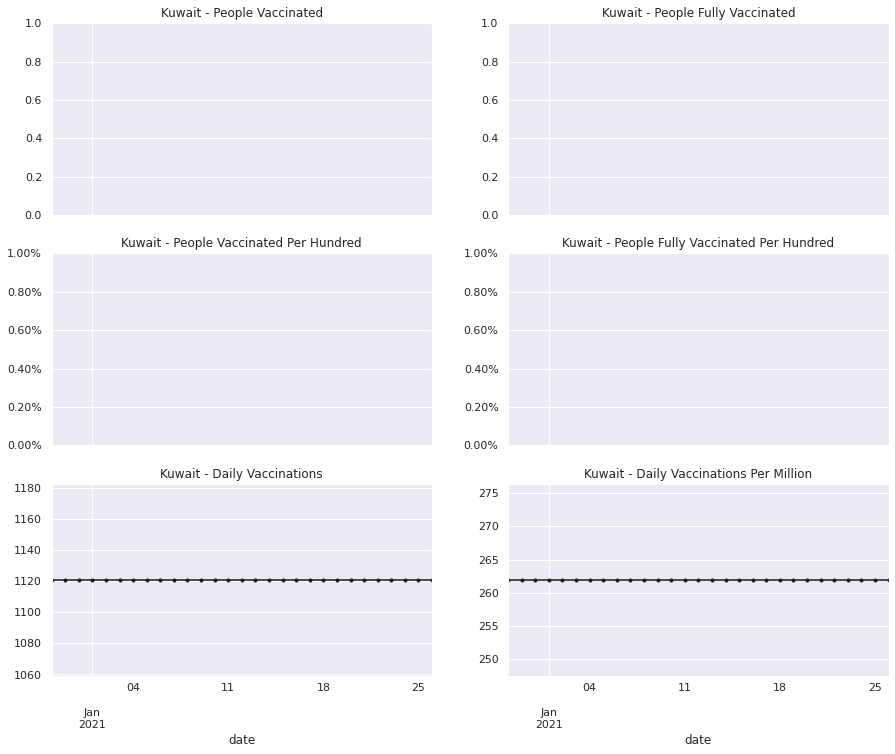

# Latvia

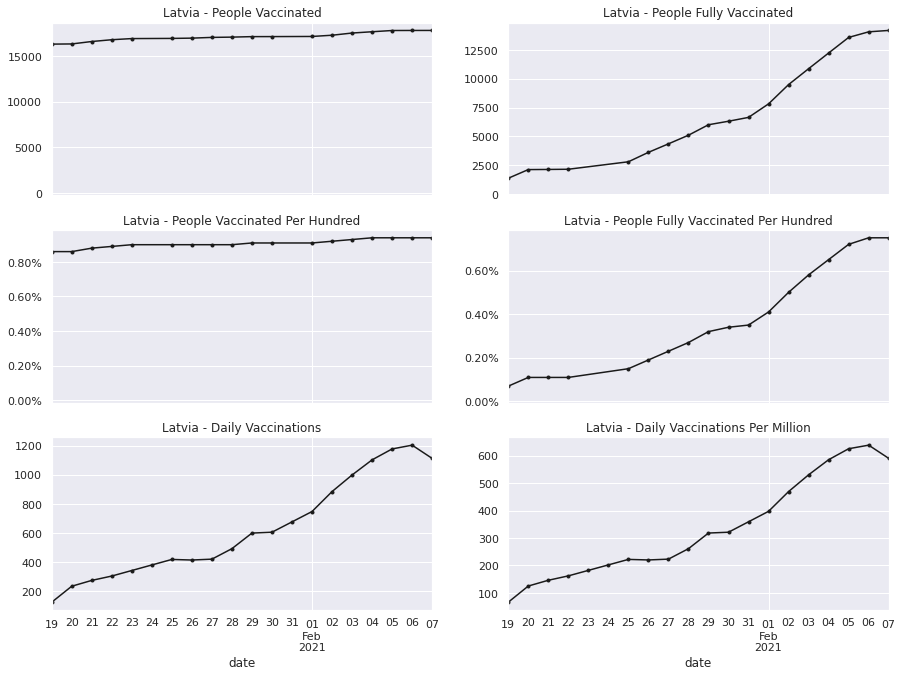

# Liechtenstein

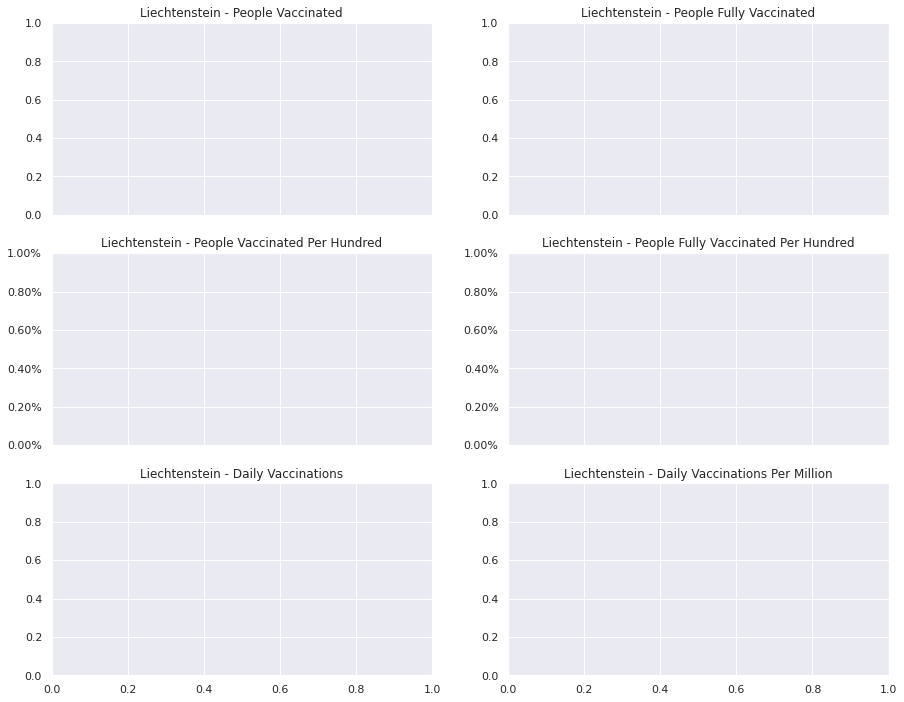

# Lithuania

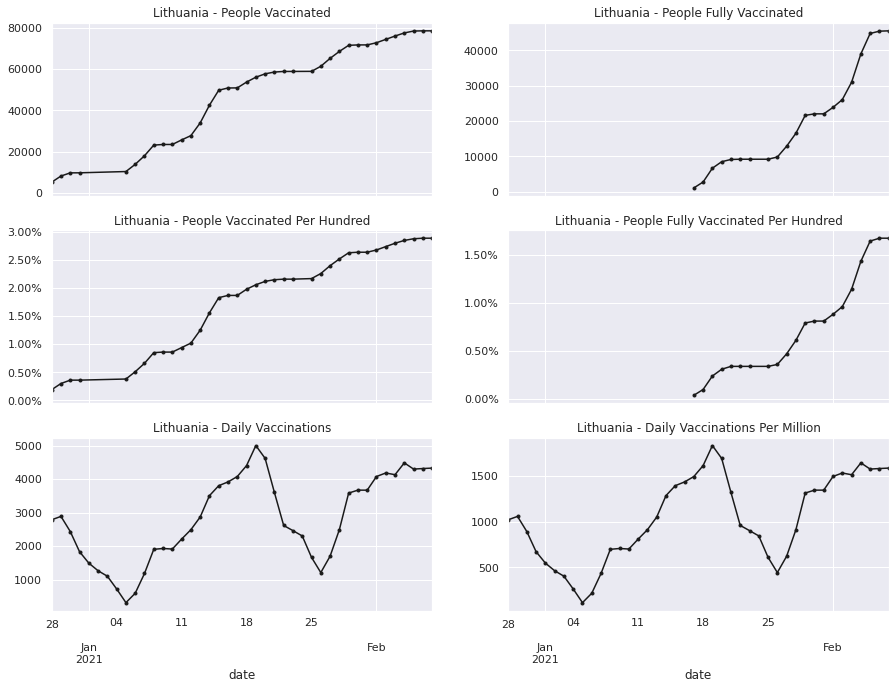

# Luxembourg

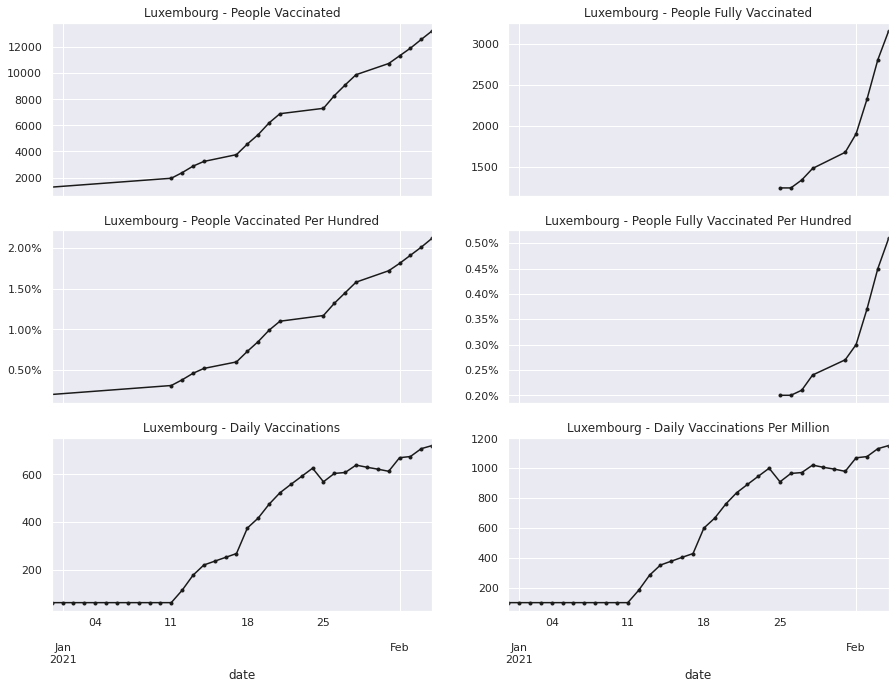

# Maldives

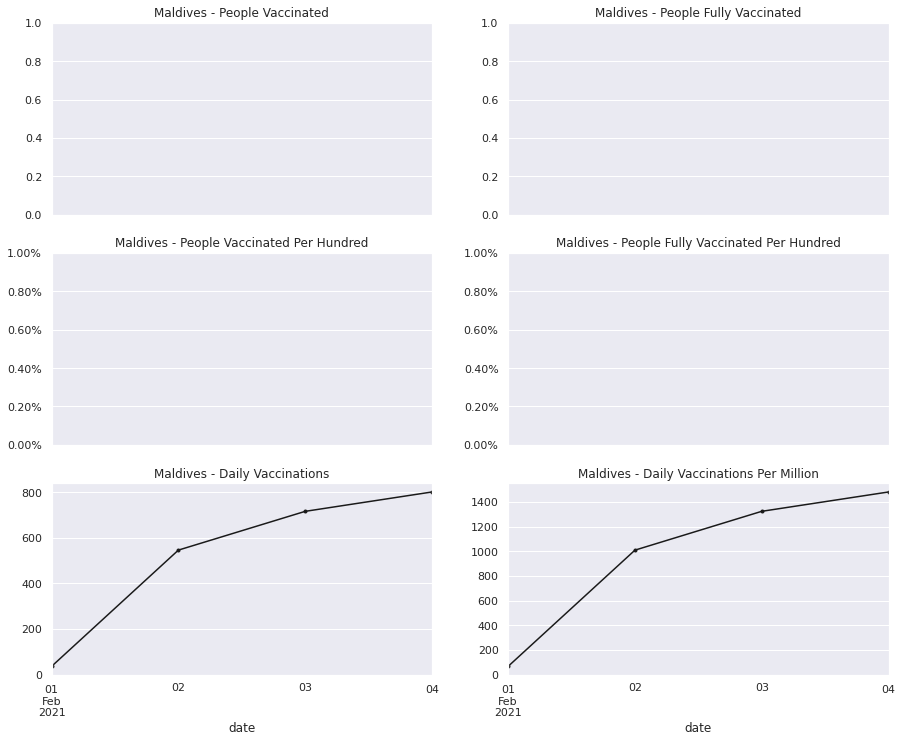

# Malta

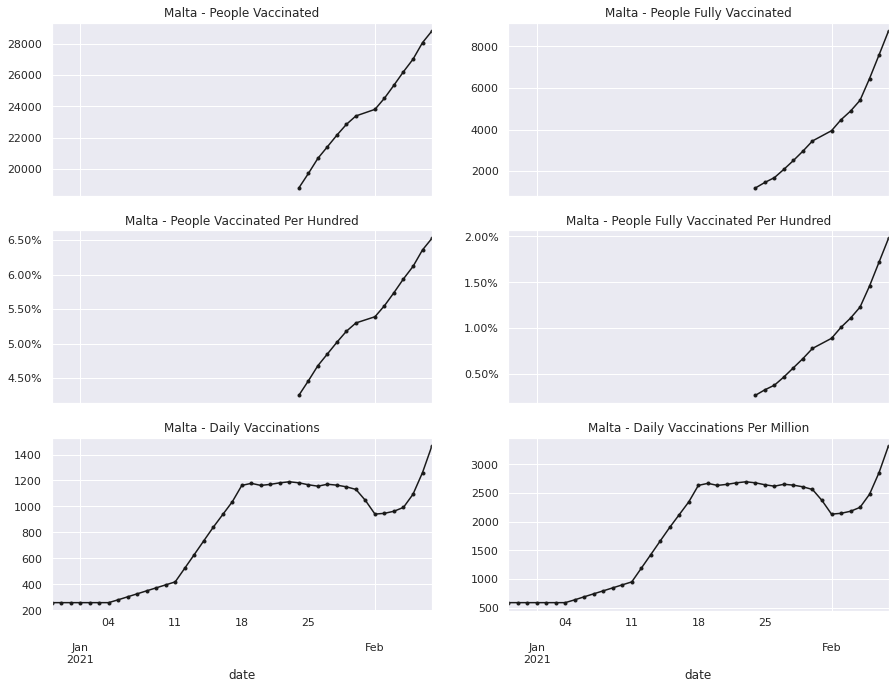

# Mexico

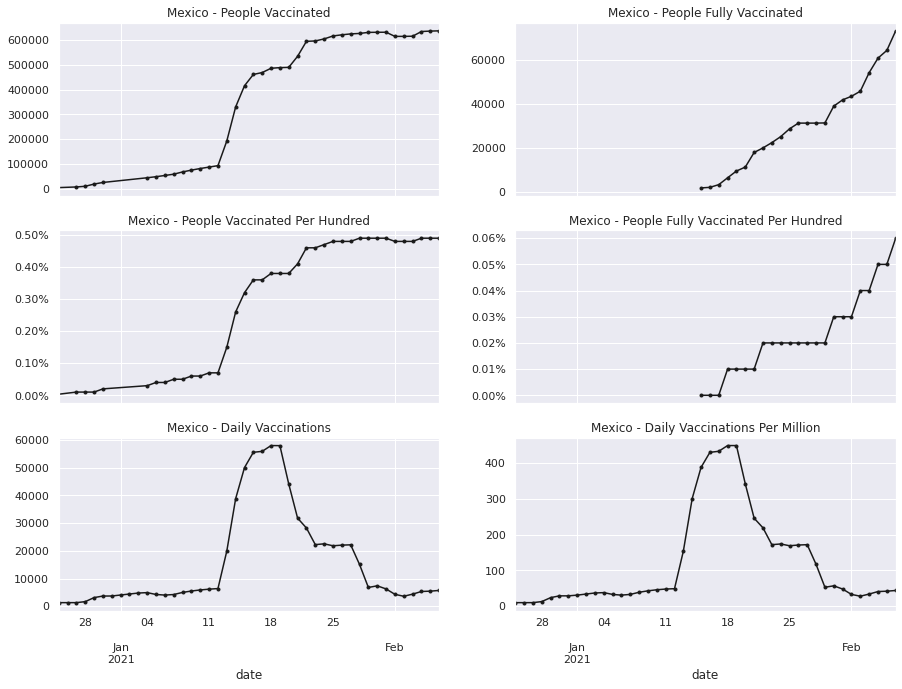

# Monaco

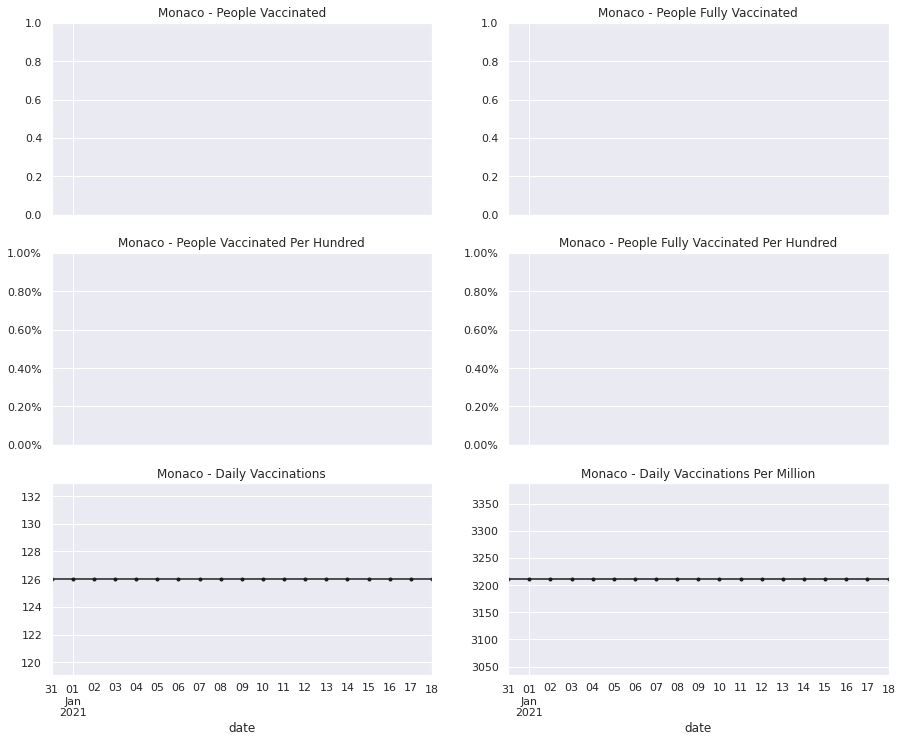

# Morocco

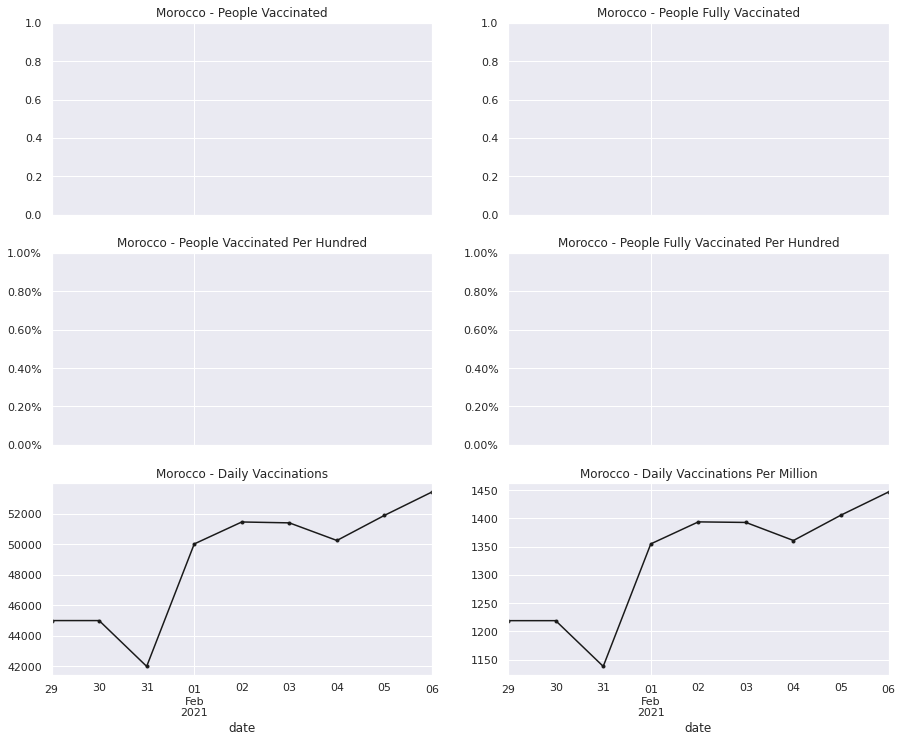

# Myanmar

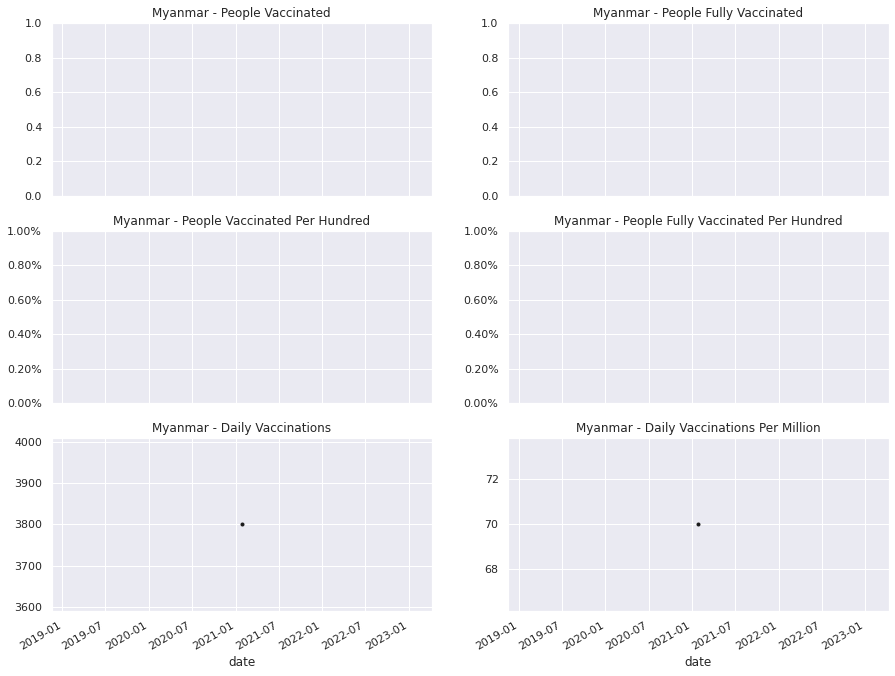

# Nepal

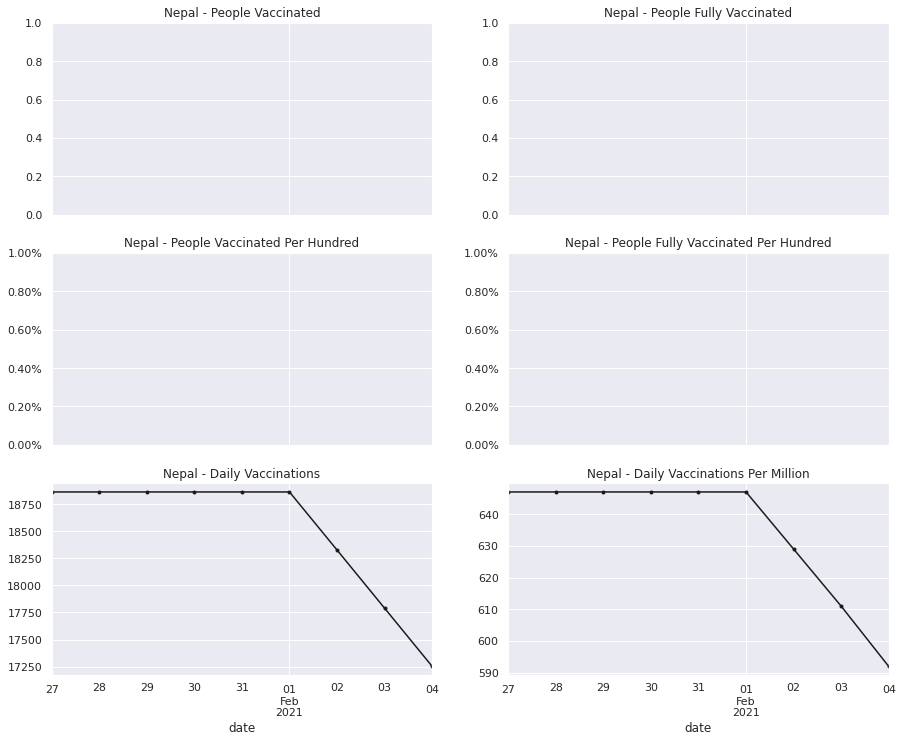

# Netherlands

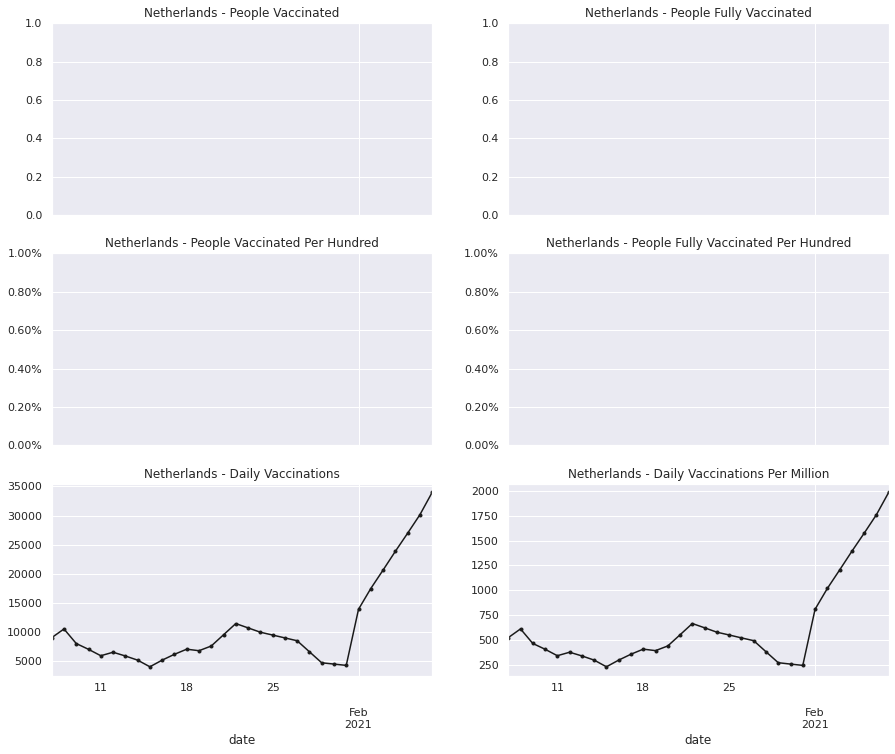

# Northern Cyprus

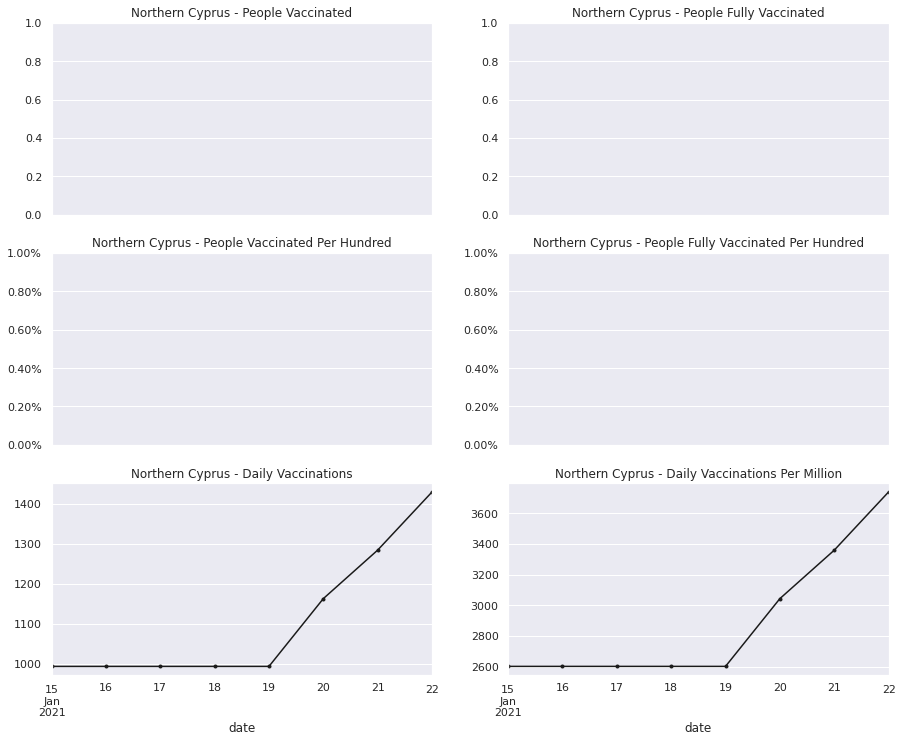

# Northern Ireland

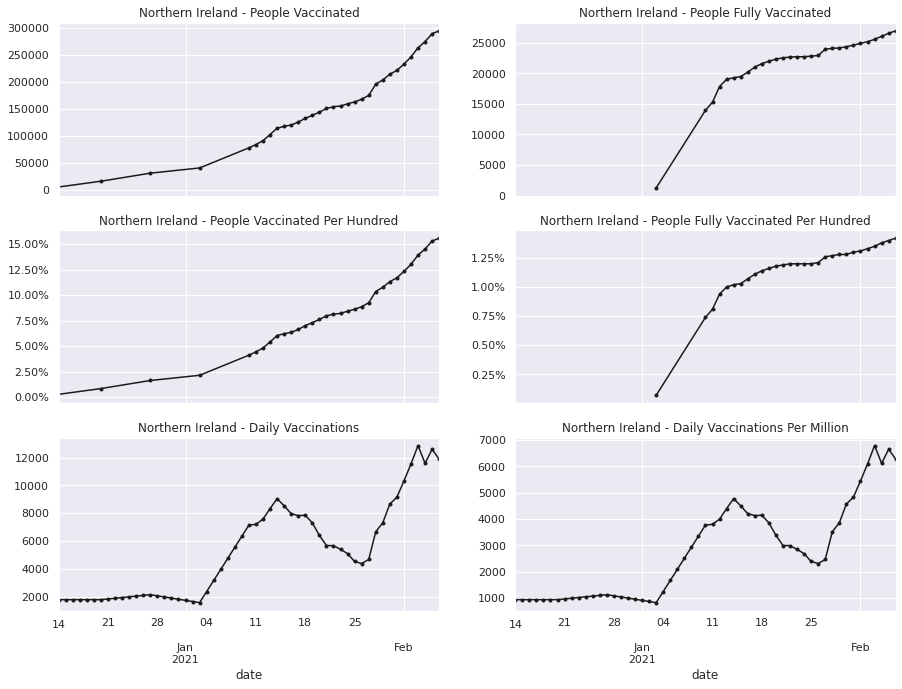

# Norway

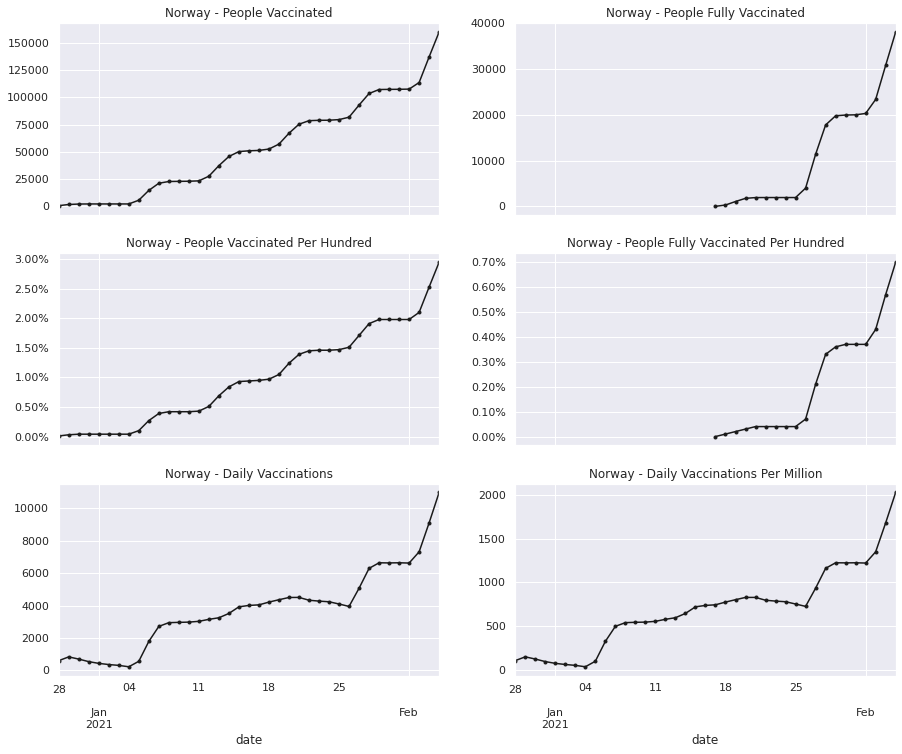

# Oman

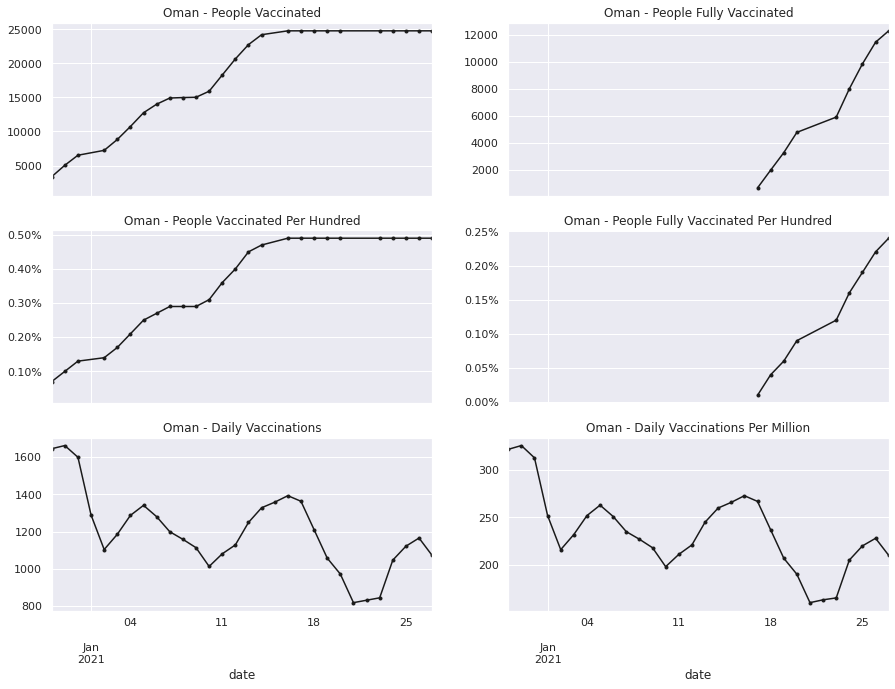

# Panama

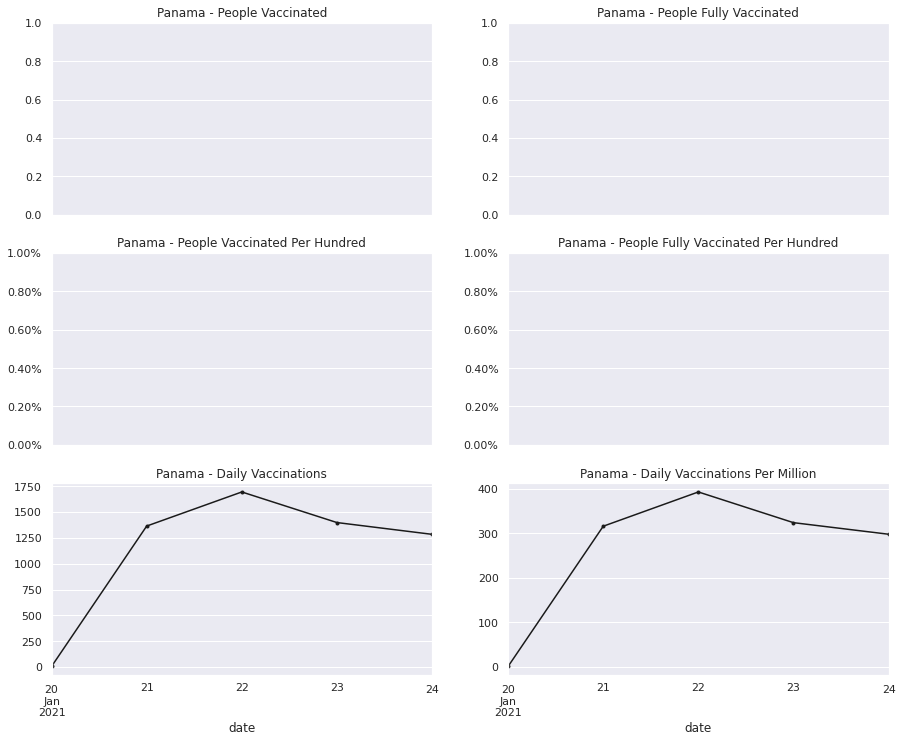

# Poland

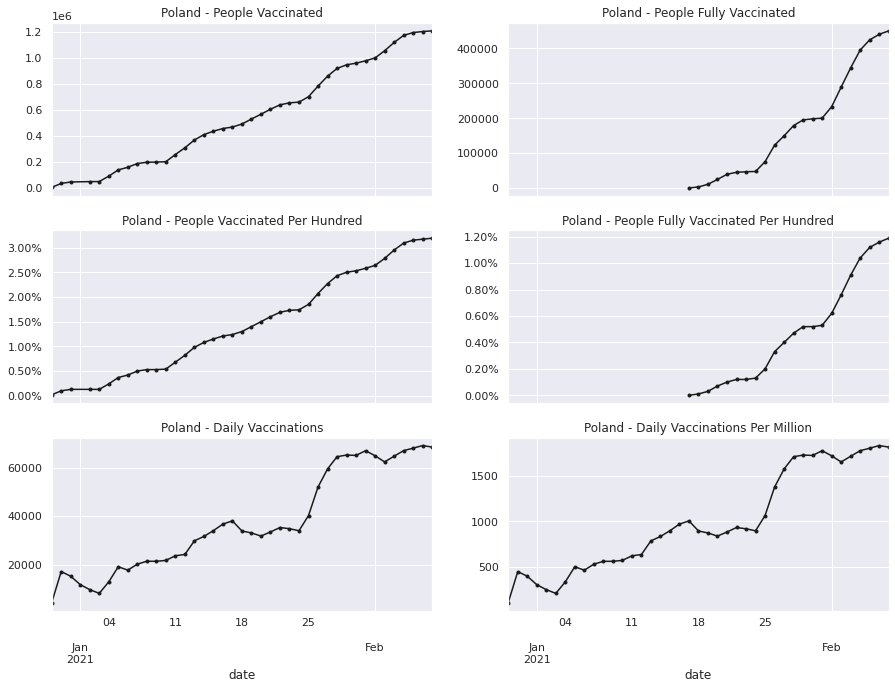

# Portugal

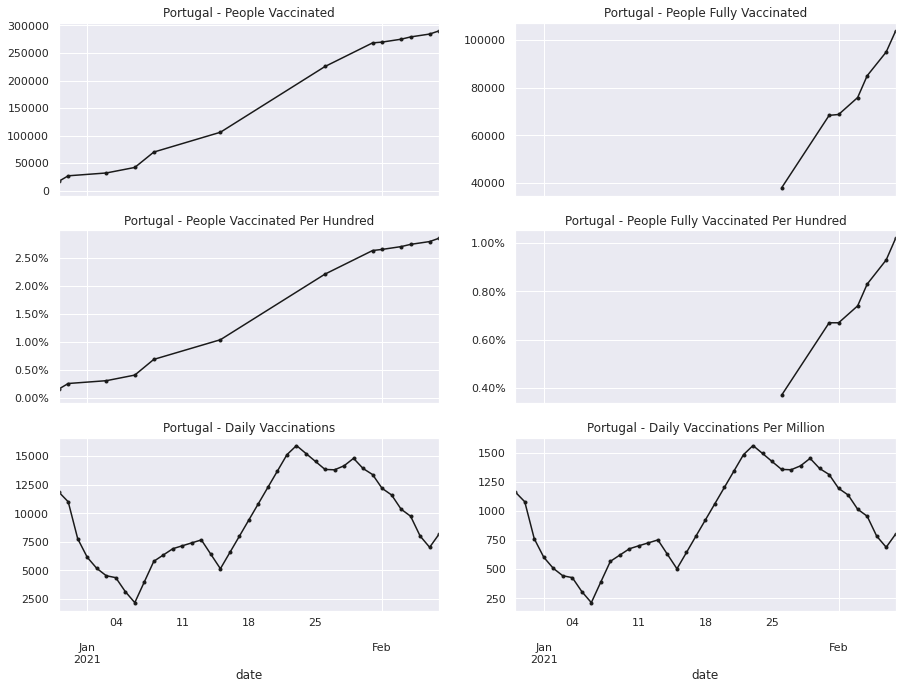

# Romania

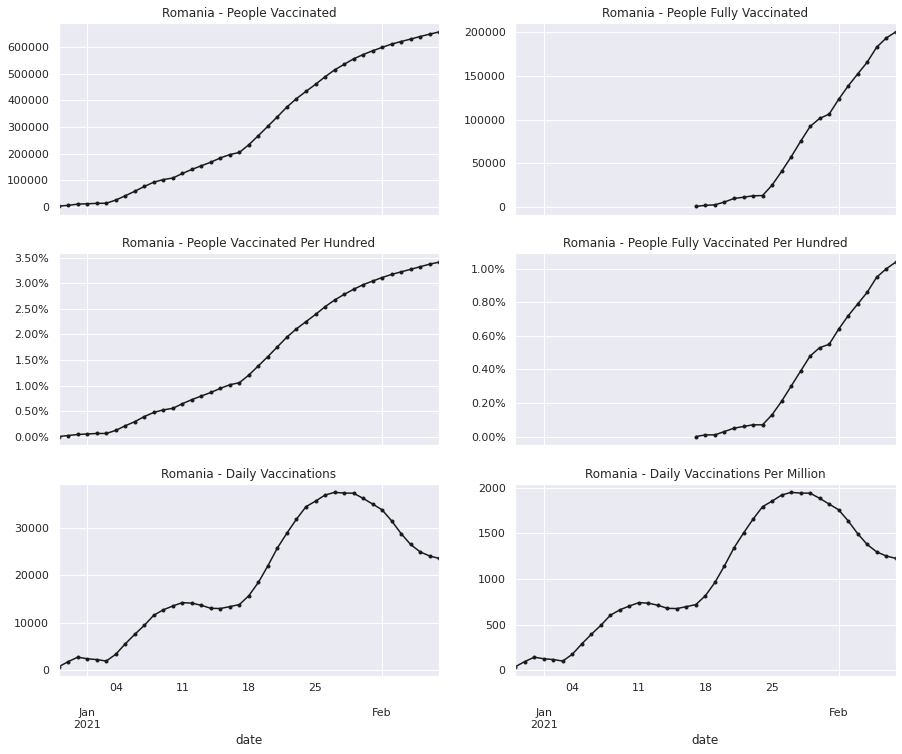

# Russia

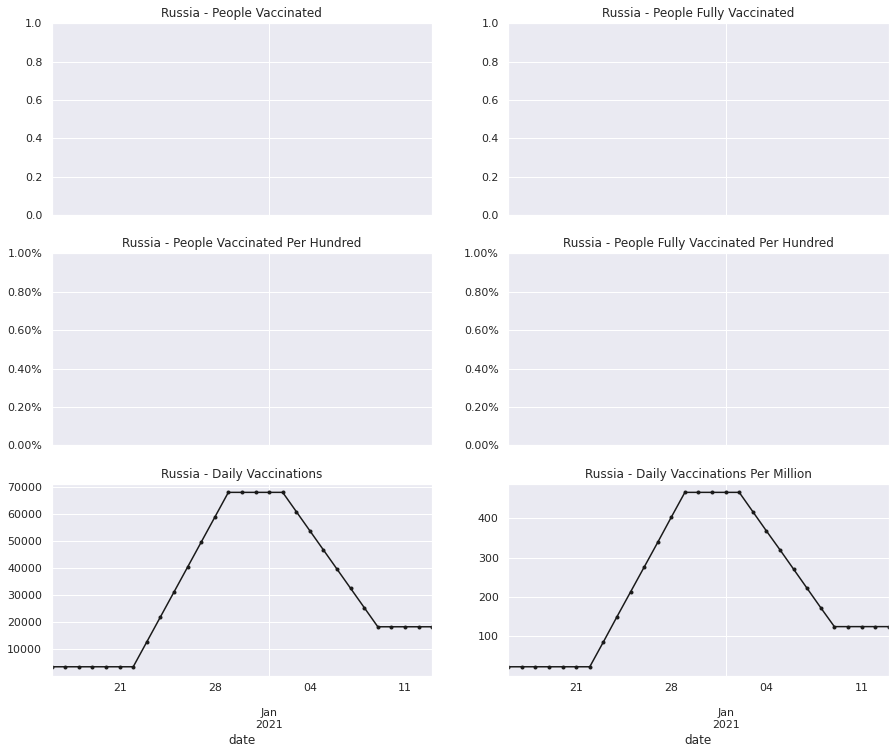

# Saint Helena

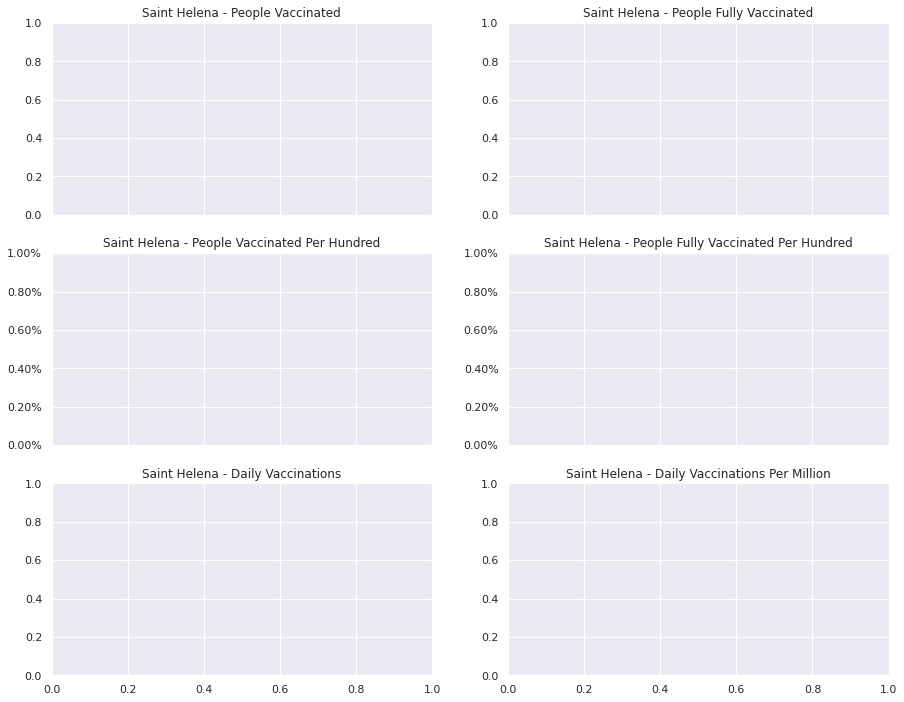

# Saudi Arabia

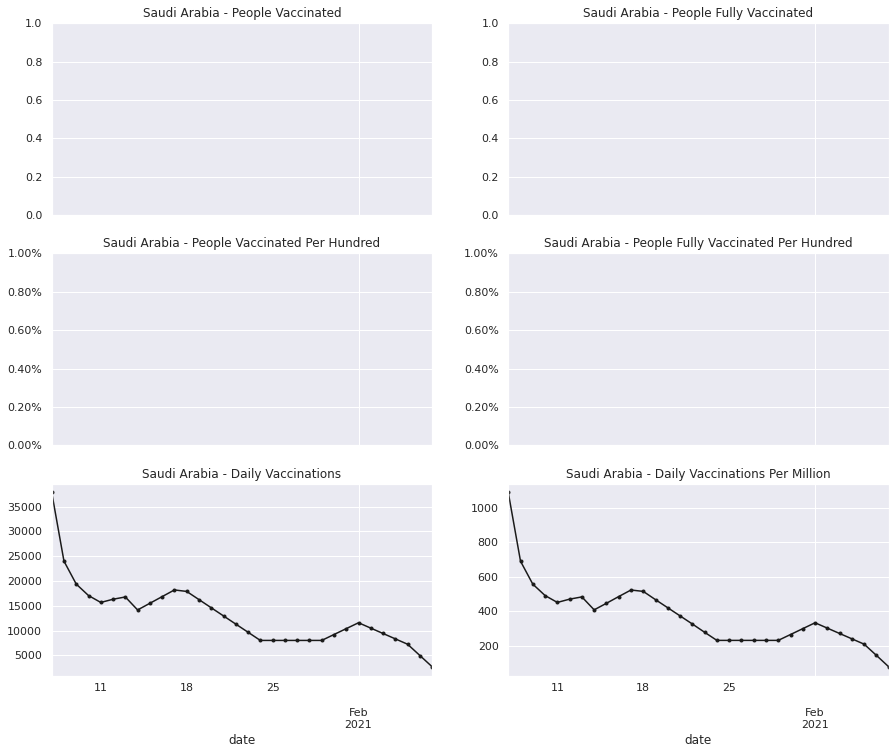

# Scotland

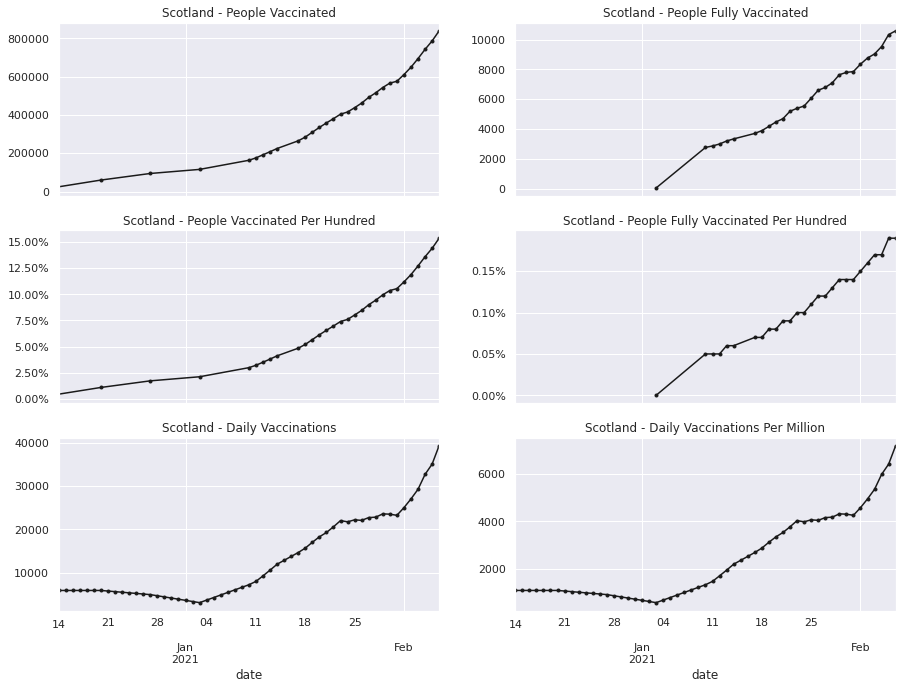

# Serbia

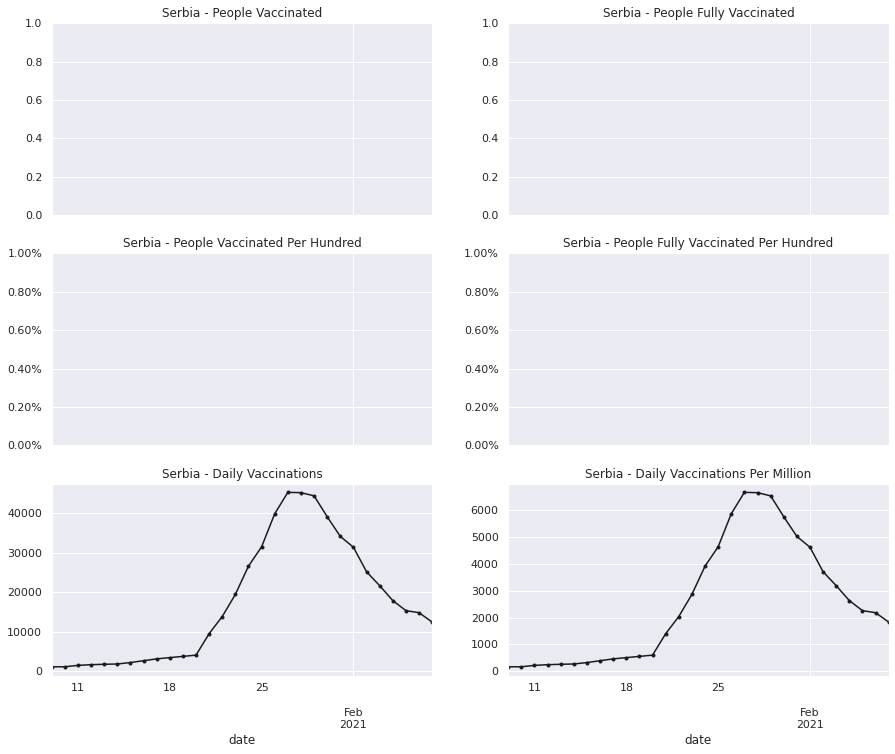

# Seychelles

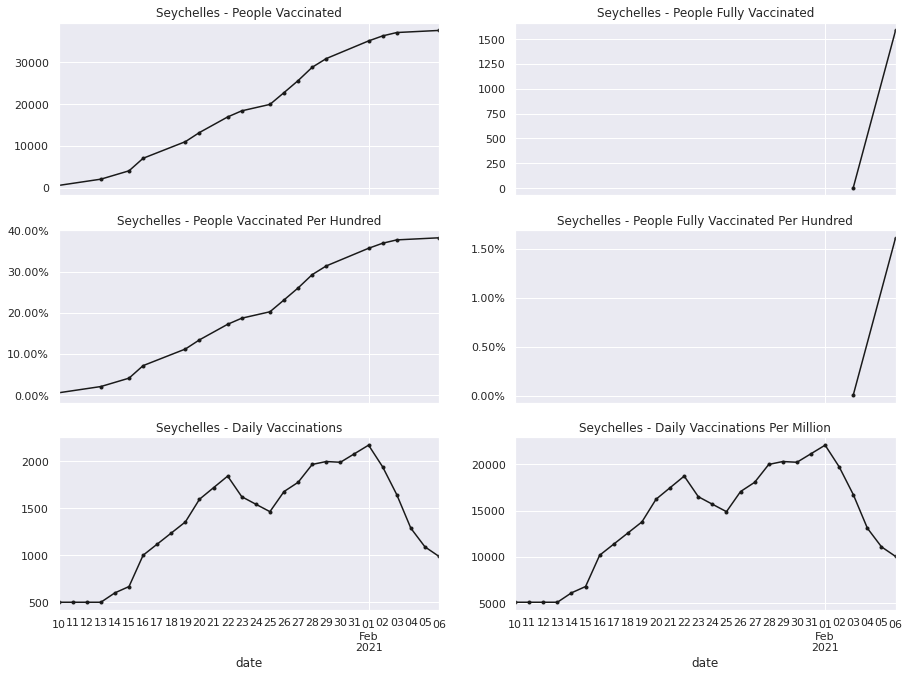

# Singapore

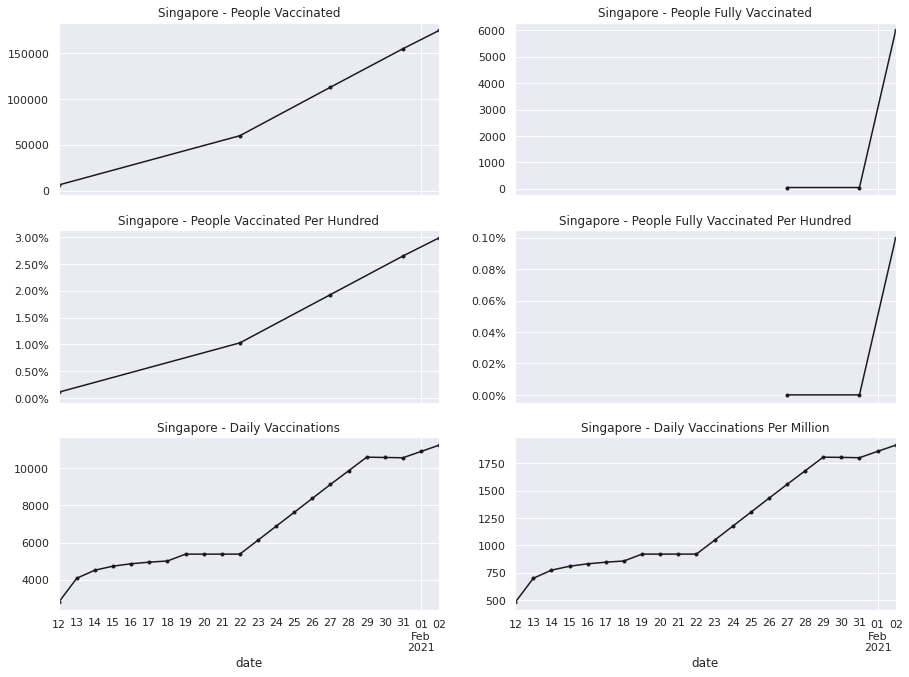

# Slovakia

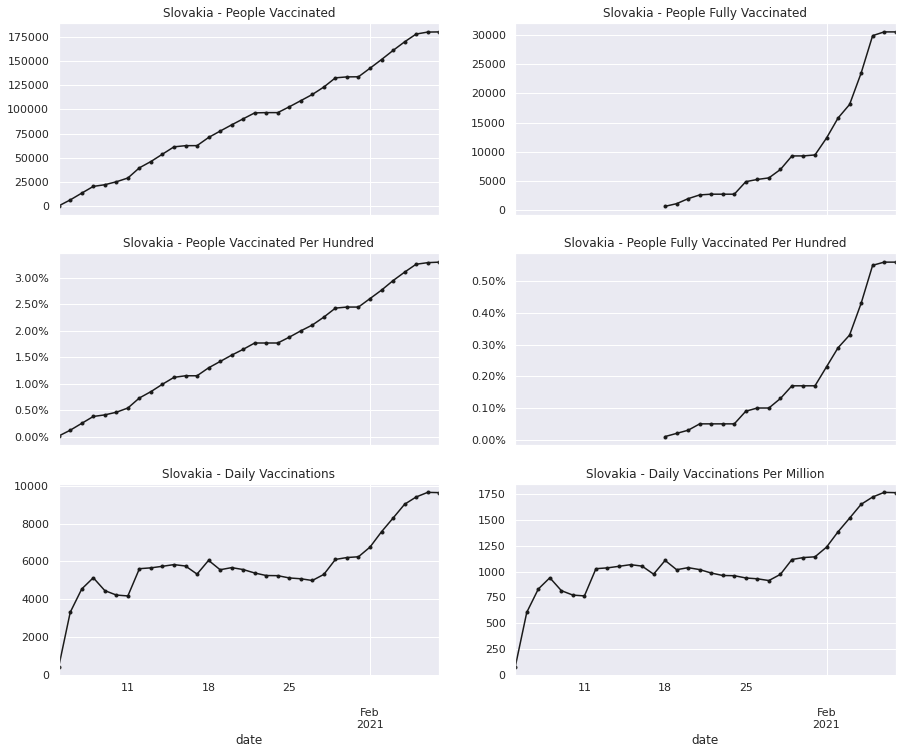

# Slovenia

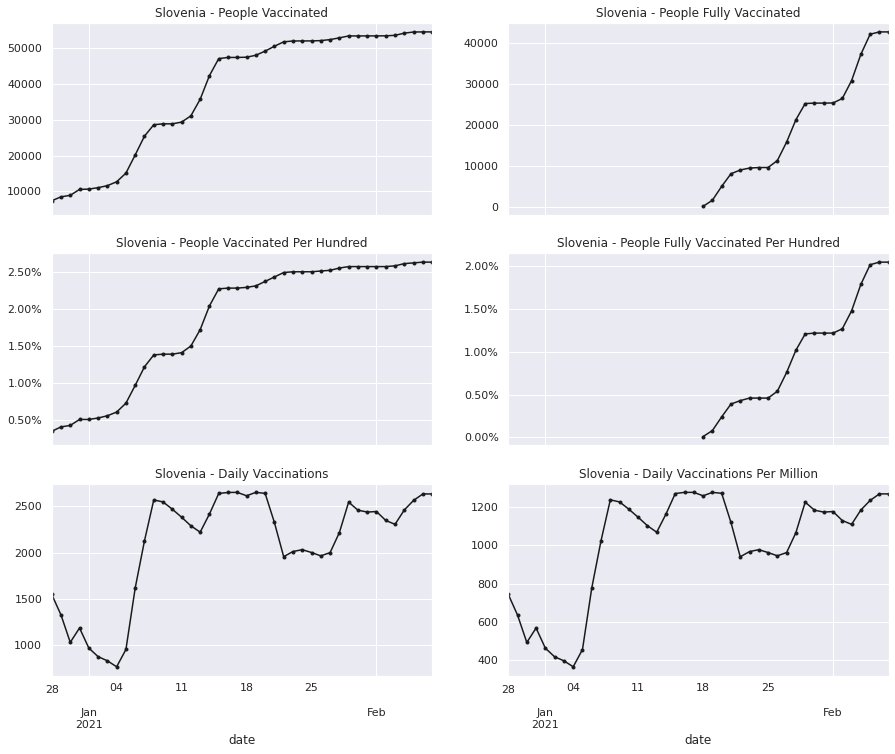

# Spain

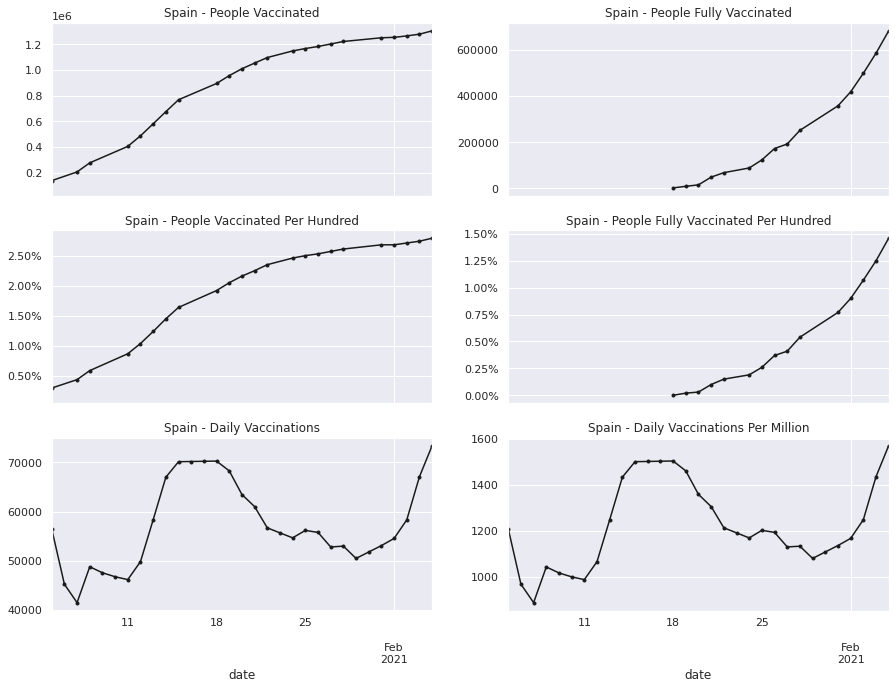

# Sri Lanka

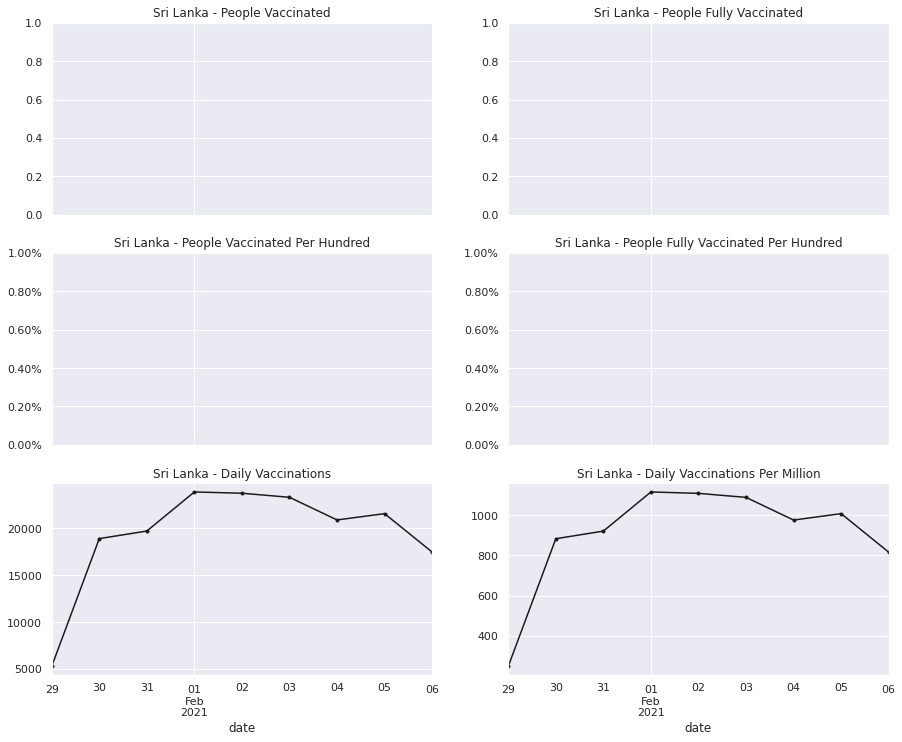

# Sweden

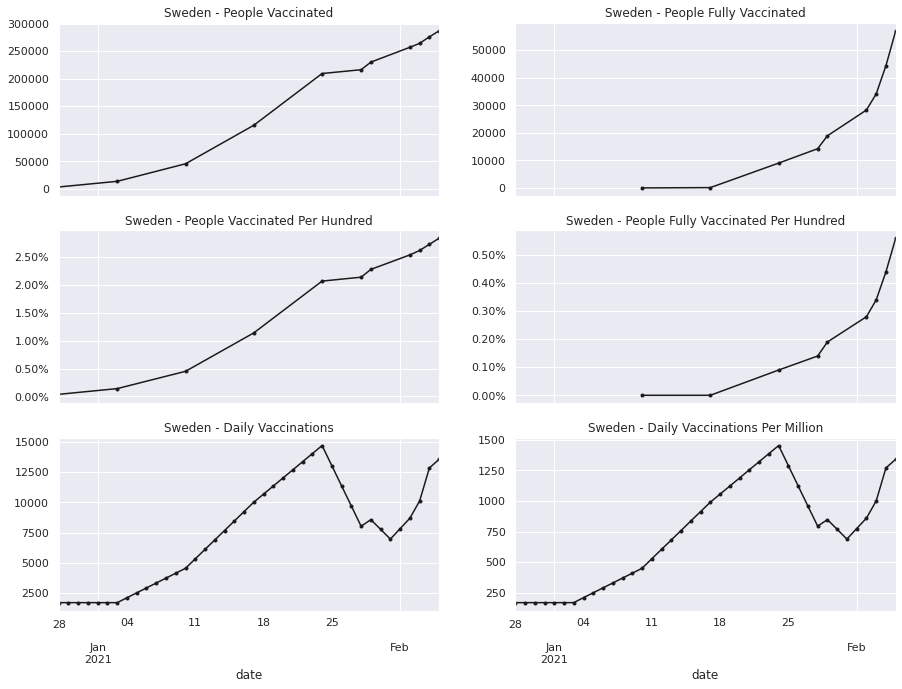

# Switzerland

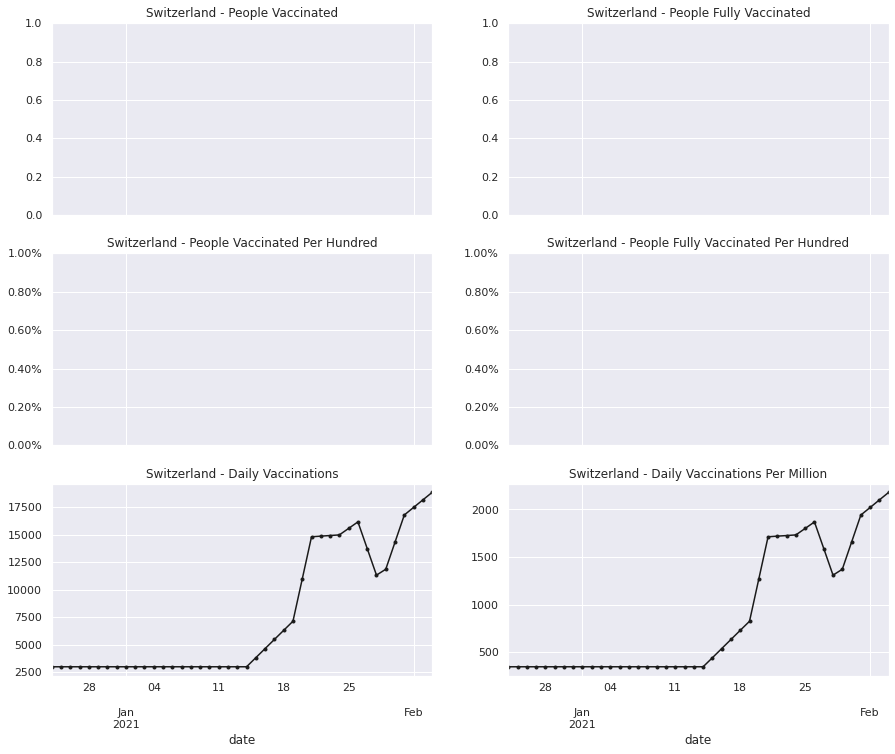

# Turkey

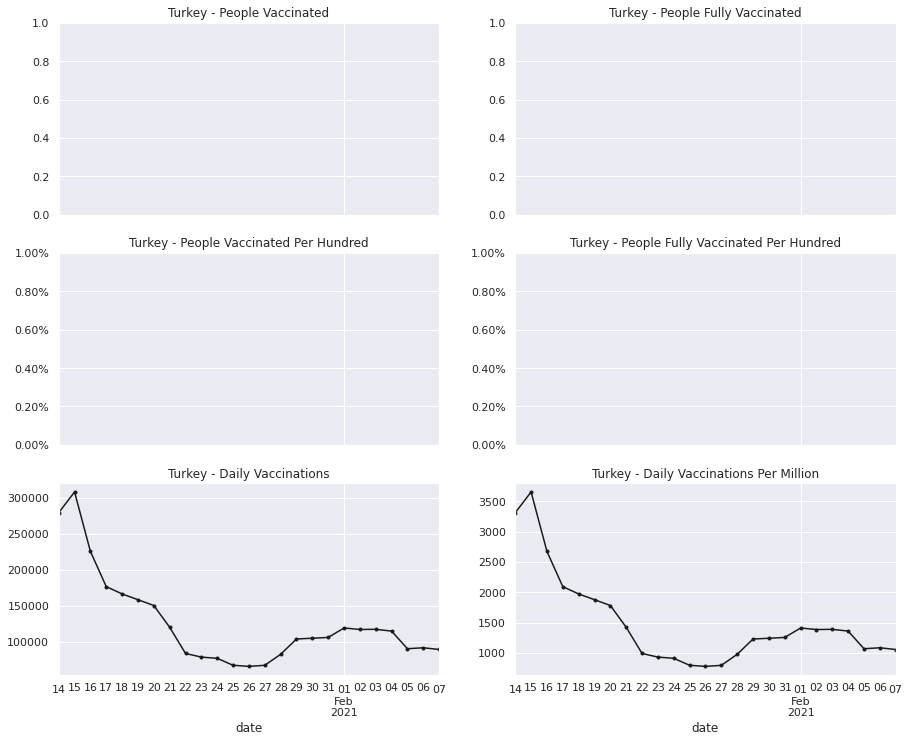

# United Arab Emirates

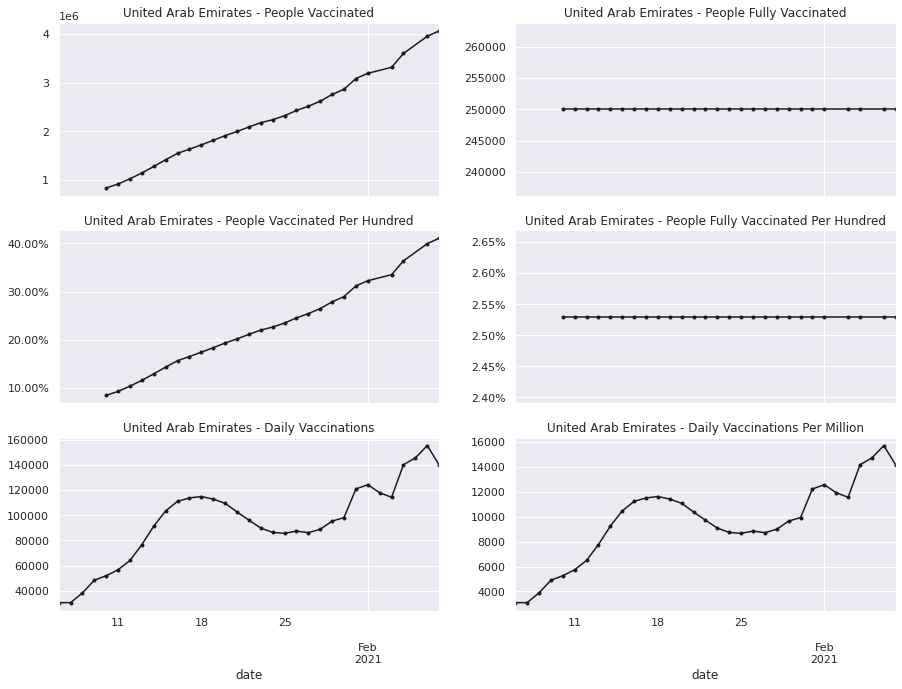

# United Kingdom

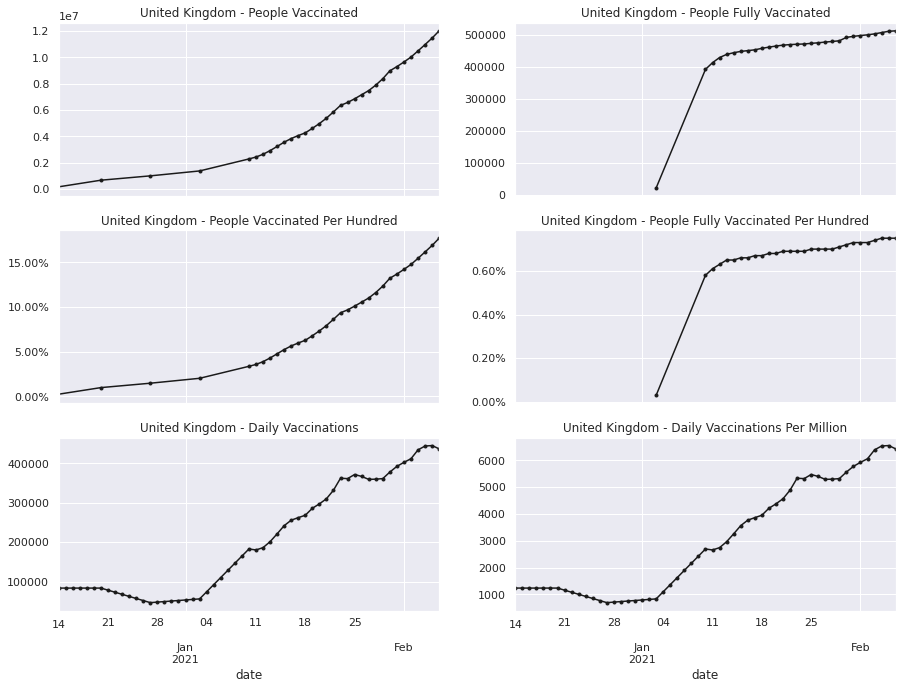

# United States

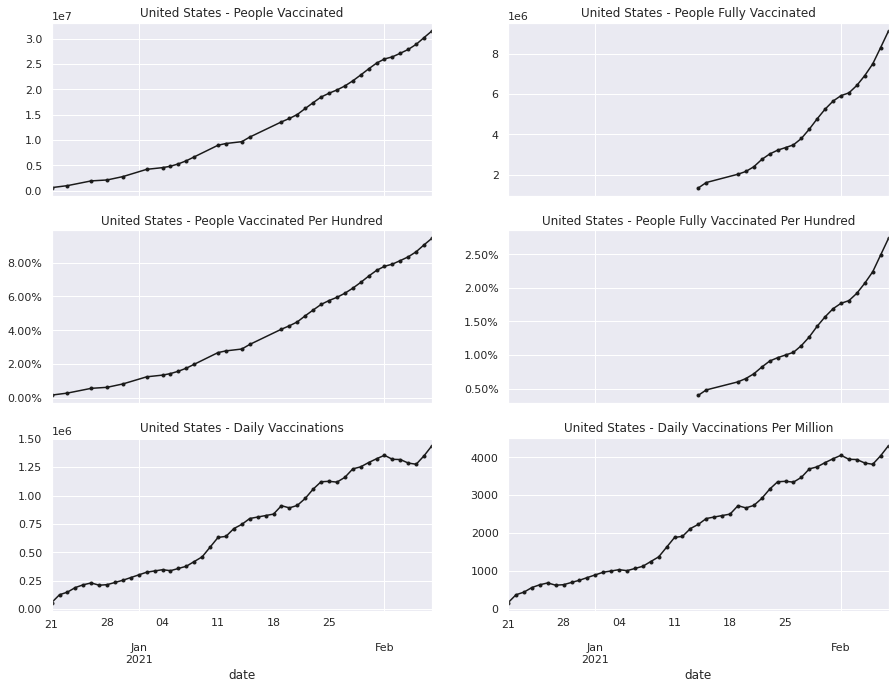

# Wales

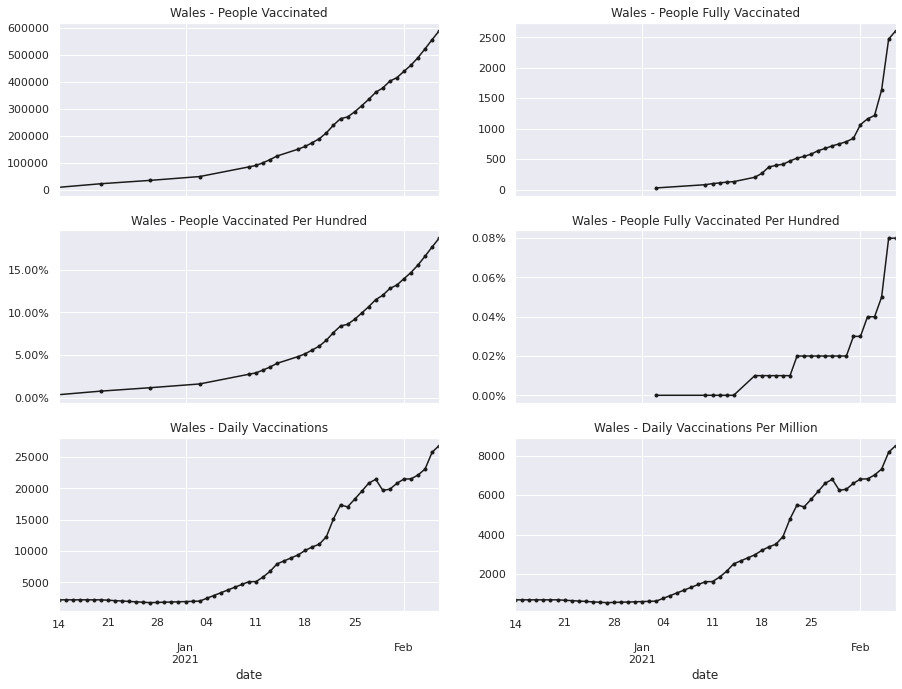

In [26]:
for country in df[df.location!='World'].location.unique():
    display(Markdown(f"# {country}"))
    _df = df[df.location==country].set_index('date')
    fig, ax = plt.subplots(3, 2, figsize=(15, 12), sharex=True)
    for i, col in enumerate(columns):
        if _df[col].dropna().size:
            _df[col].dropna().plot(y=col, ax=ax.flat[i], color='k', legend=False, marker='.')
        ax.flat[i].set(
            title=f"{country} - {col.replace('_', ' ').title()}"
        )
    ax[1,0].yaxis.set_major_formatter(mtick.PercentFormatter(100, 2))
    ax[1,1].yaxis.set_major_formatter(mtick.PercentFormatter(100, 2))
    plt.show()